In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install packages for machine learning and data handling
!pip install catboost
!pip install imbalanced-learn

# Import feature selection tools from scikit-learn
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2

# Import preprocessing tools
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Import evaluation metrics for model performance
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report


# Import data splitting and balancing techniques
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE

# Import GridSearchCV for hyperparameter optimization
from sklearn.model_selection import GridSearchCV

# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.ticker as mtick

# Import model training algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


**Load** **Dataset**

In [ ]:
# Load the first dataset
dataf1 = pd.read_csv('/content/drive/My Drive/diabetes_binary_5050.csv')

# Loading second dataset
dataf2 = pd.read_csv('/content/drive/My Drive/diabetes_binary.csv')

# show first dataset
print('shape of the first dataset: {}'.format(dataf1.shape))

# show second dataset
print('shape of the second dataset: {}'.format(dataf2.shape))


shape of the first dataset: (70692, 22)
shape of the second dataset: (253680, 22)


 **Before Dataset Cleanup**

In [ ]:
# Display second data file
dataf2.head()

# shows summary information of the second dataset
dataf2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

**Check Null Vlues**

In [ ]:
# null values in the first dataset
counts1 = dataf1.isnull().sum()

# Check for null values for second dataset
counts2 = dataf2.isnull().sum()

# Print count of null values in the first dataset
print(counts1)

# Print count of null values in the second dataset
print(counts2)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0

**Preprocessing**

In [ ]:
# Checking for missing values in the dataset
dataf2.isna().sum()

# Describing the dataset's statistical properties
dataf2.describe()

# Identifying duplicate rows in the dataset
duplicates = dataf2[dataf2.duplicated()]

# Counting the number of duplicate rows
num_duplicates = len(duplicates)

# Outputting the duplicates
print(f"Number of Duplicate Rows in dataset: {num_duplicates}")

# Displaying duplicate rows, if any
duplicates.head()

# Defining a function to clean the dataset
def data_clean(dataframe):

    # Establishing BMI categories using specified bins and labels
    bin = [0, 18.5, 24.9, 29.9, float('inf')]
    label = [1, 2, 3, 4]

    # Removing duplicate rows and categorizing BMI
    df = dataframe.drop_duplicates().assign(BMI_bins=dataframe['BMI'].pipe(pd.cut, bins=bin, labels=label))

    # Resetting the index to ensure a continuous integer index for the DataFrame
    df = df.reset_index(drop=True)

    # Converting columns to 'uint8' for optimized storage and performance
    # 'uint8' is used for categorical and binary features due to its memory efficiency
    df = df.astype({
    'Diabetes_binary': 'uint8',          # Target variable: diabetes status
    'HighBP': 'uint8',                   # High blood pressure indicator
    'HighChol': 'uint8',                 # High cholesterol indicator
    'CholCheck': 'uint8',                # Cholesterol check status
    'BMI': 'uint8',                      # Body Mass Index
    'Smoker': 'uint8',                   # Smoking status
    'Stroke': 'uint8',                   # Stroke history
    'HeartDiseaseorAttack': 'uint8',     # Heart disease or attack history
    'PhysActivity': 'uint8',             # Physical activity level
    'Fruits': 'uint8',                   # Fruit consumption
    'Veggies': 'uint8',                  # Vegetable consumption
    'HvyAlcoholConsump': 'uint8',        # Heavy alcohol consumption
    'AnyHealthcare': 'uint8',            # Access to healthcare
    'NoDocbcCost': 'uint8',              # Cost barrier to doctor visits
    'GenHlth': 'uint8',                  # General health status
    'MentHlth': 'uint8',                 # Mental health status
    'PhysHlth': 'uint8',                 # Physical health status
    'DiffWalk': 'uint8',                 # Difficulty walking
    'Sex': 'uint8',                      # Gender
    'Age': 'uint8',                      # Age
    'Education': 'uint8',                # Education level
    'Income': 'uint8',                   # Income level
    'BMI_bins': 'uint8'                  # Categorized BMI bins
    })


    # Return the processed DataFrame
    return df

Number of Duplicate Rows in dataset: 24206


**After Dataset Cleaning**

In [ ]:
# Apply the data cleaning function to the second dataset
df = data_clean(dataf2)

# Clean the first dataset and store the result
dataf1_clean = data_clean(dataf1)

# Display the summary information of the cleaned second dataset
df.info()

# Generate a comprehensive description of all columns without transposing
df.describe(include='all').T

# Grouping variables into target, boolean, and numeric categories
# Specify the target variable
t__variables = 'Diabetes_binary'

# Identify boolean variables (binary features) excluding the target
bool_variables = dataf2.columns[dataf2.nunique() == 2].difference([t__variables])

# Identify numeric variables that are not boolean or the target
num_variables = [feature for feature in dataf2.columns if feature not in bool_variables and feature != t__variables]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  uint8
 1   HighBP                229474 non-null  uint8
 2   HighChol              229474 non-null  uint8
 3   CholCheck             229474 non-null  uint8
 4   BMI                   229474 non-null  uint8
 5   Smoker                229474 non-null  uint8
 6   Stroke                229474 non-null  uint8
 7   HeartDiseaseorAttack  229474 non-null  uint8
 8   PhysActivity          229474 non-null  uint8
 9   Fruits                229474 non-null  uint8
 10  Veggies               229474 non-null  uint8
 11  HvyAlcoholConsump     229474 non-null  uint8
 12  AnyHealthcare         229474 non-null  uint8
 13  NoDocbcCost           229474 non-null  uint8
 14  GenHlth               229474 non-null  uint8
 15  MentHlth              229474 non-n

**Outlier Detection**

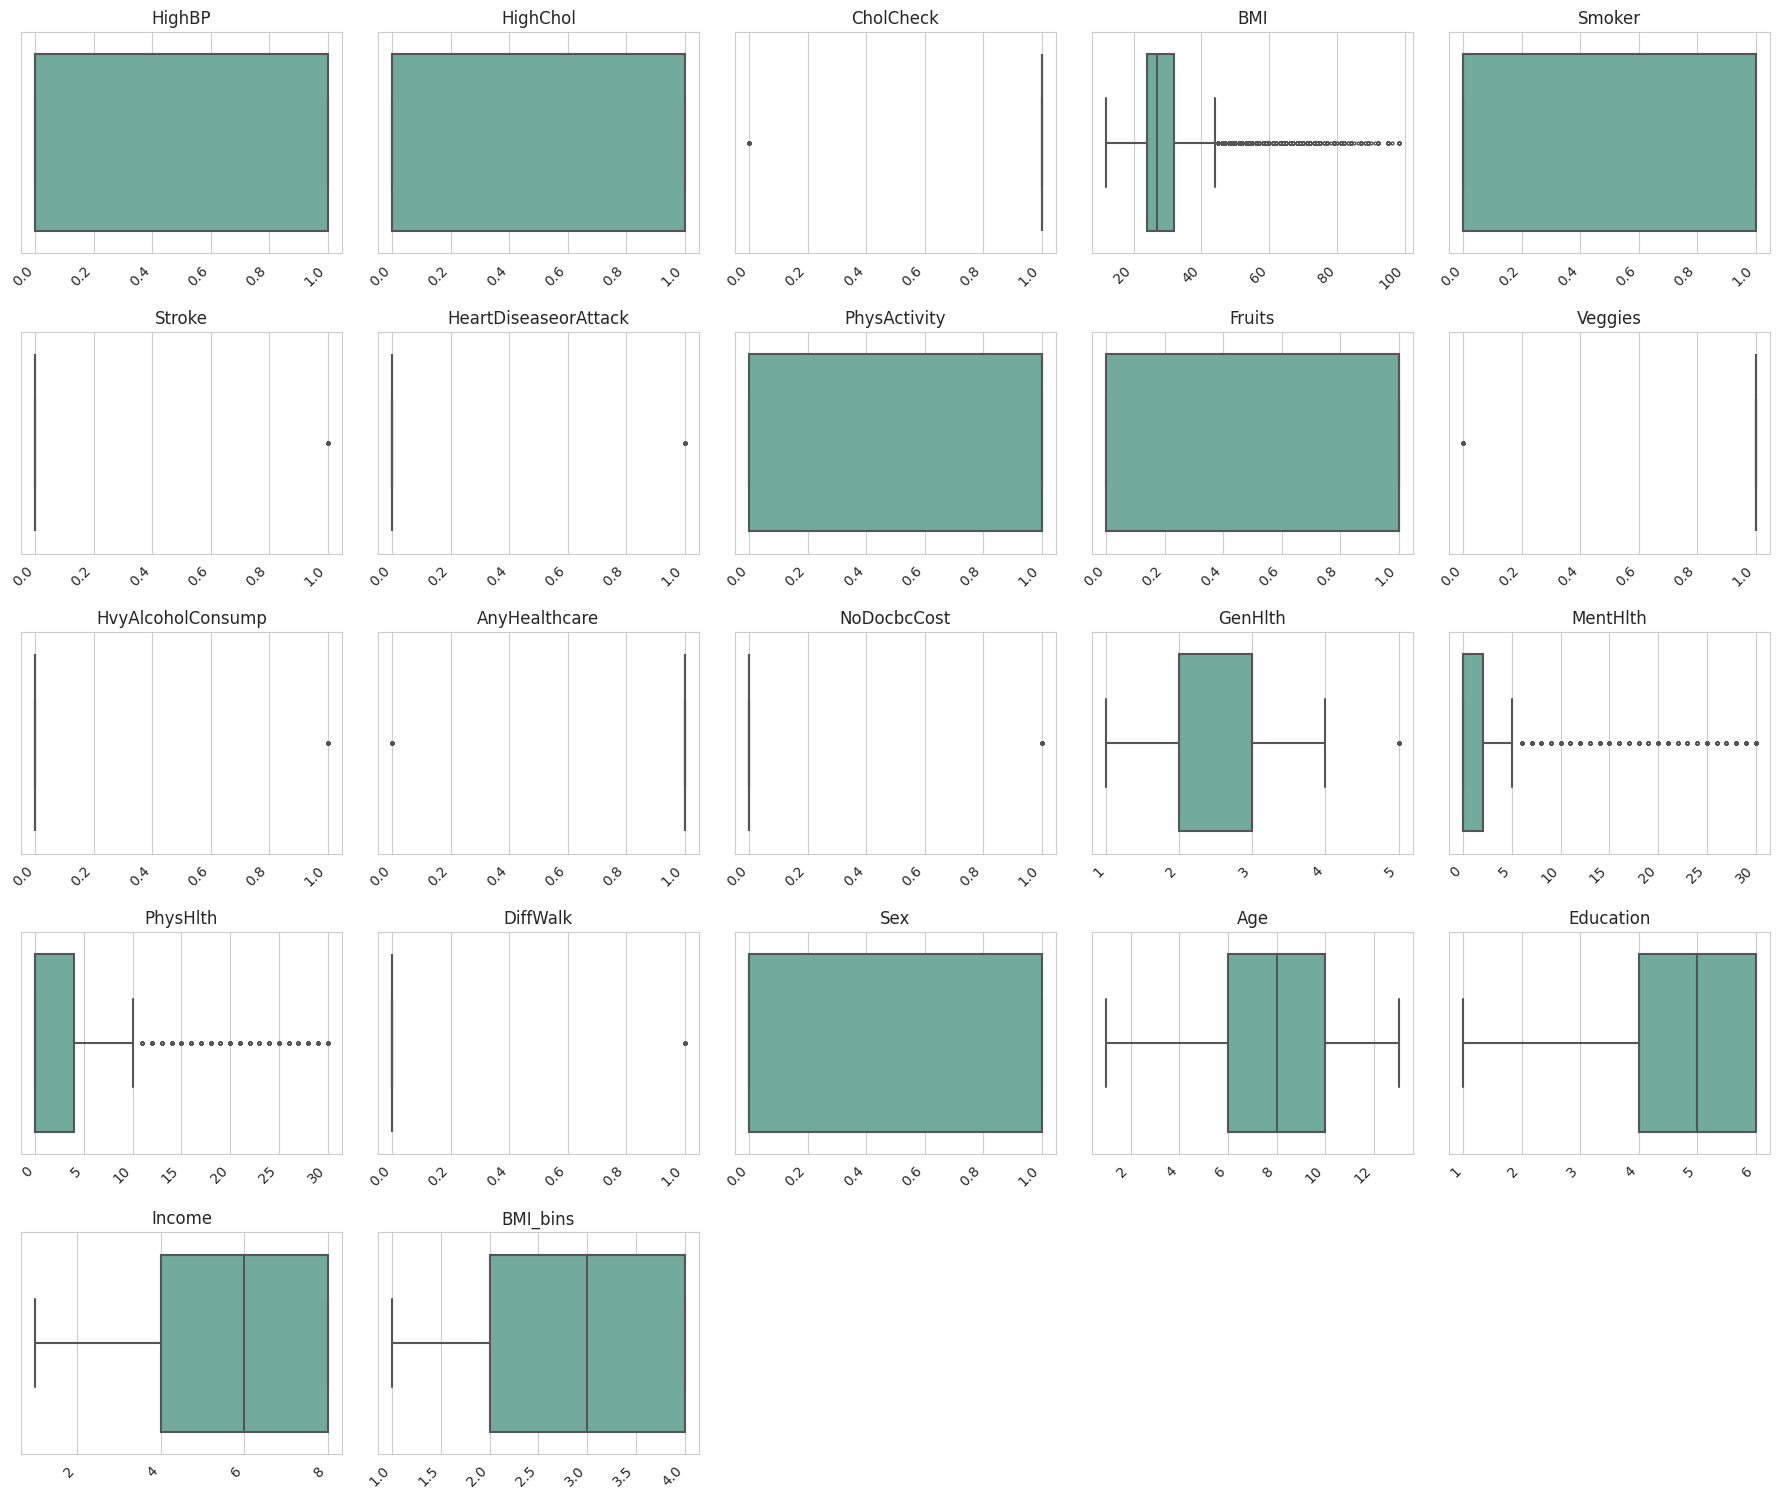

In [ ]:
# Import plotting libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of attributes to plot
attributes = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
    'Income', 'BMI_bins'
]

# Setting dimensions for the figure
plt.figure(figsize=(18, 15))

# Configure the aesthetic style for the plots
sns.set_style('whitegrid')  # Use a clean grid background for clarity

# Generate individual plots for each feature
for idx, attr in enumerate(attributes, 1):
    plt.subplot(5, 5, idx)
    sns.boxplot(x=df[attr], color='#69b3a2', fliersize=2, linewidth=1.5)
    plt.title(attr, fontsize=12)
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right', fontsize=10)

# Optimize to fit all subplots neatly
plt.tight_layout()

# Render the plots
plt.show()


**Visualization of Target Variable**

Diabetes_binary
1     35097
0    194377
Name: count, dtype: int64
Diabetes_binary
1    15.29%
0    84.71%
Name: proportion, dtype: object



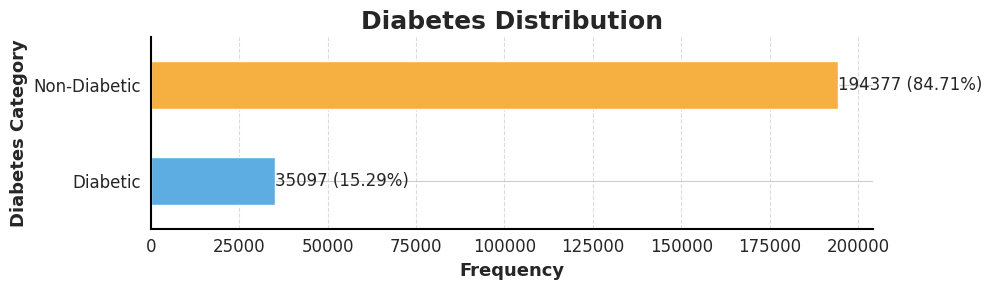

In [ ]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Count occurrences of each category in 'Diabetes_binary'
counts_diabetes = df['Diabetes_binary'].value_counts(ascending=True)

# Compute percentage representation for each category in 'Diabetes_binary'
percentages_diabetes = df['Diabetes_binary'].value_counts(normalize=True, ascending=True).apply(lambda x: f'{x:.2%}')

# Display the frequency count of each category
print(counts_diabetes)

# Display the percentage distribution of each category
print(percentages_diabetes)
print()

# Choose colors for the bar plot
plot_colors = ['#5DADE2', '#F5B041']  # Blue and orange color scheme

# Create a horizontal bar plot with custom colors and size
bar_plot = counts_diabetes.plot(kind='barh', figsize=(10, 3), color=plot_colors)

# Remove the top and right borders from the plot
bar_plot.spines[['top', 'right']].set_visible(False)

# Add a border around the plot with a specific color and thickness
for border in bar_plot.spines.values():
    border.set_edgecolor('black')  # Set border color
    border.set_linewidth(1.5)      # Set border width

# Label each bar with its count and percentage
for index, (count, percentage) in enumerate(zip(counts_diabetes, percentages_diabetes)):
    bar_plot.text(count + 1, index, f'{count} ({percentage})', va='center', fontsize=12)


plt.title('Diabetes Distribution', fontsize=18, weight='bold')
plt.xlabel('Frequency', fontsize=13, weight='bold')
plt.ylabel('Diabetes Category', fontsize=13, weight='bold')

# Adjust tick label sizes for readability
plt.xticks(fontsize=12)
plt.yticks(ticks=[0, 1], labels=['Diabetic', 'Non-Diabetic'], fontsize=12)

# Include gridlines along the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjustment to fits properly in the plot
plt.tight_layout()

plt.show()


 **Visualization of Category Variables**

In [ ]:
# Define a palette of distinct colors for the plot
color_palette = ['#4a031d', '#c9661e', '#3366FF', '#FF33CC', '#FFFF33',
                  '#33CCFF', '#FF3399', '#99FF33', '#FF6633', '#33FFCC']

# Function to visualize a categorical variable
def visualize_categorical_feature(feature_name):
    """

    Args:
      feature_name:
    """

    # Aggregate data by 'Diabetes_binary' and calculate relative frequencies
    aggregated_data = df.groupby('Diabetes_binary')[feature_name].value_counts(normalize=True).unstack().iloc[:, ::-1]  # Indent this line

    # Calculate the number of distinct categories and select colors accordingly
    category_count = len(aggregated_data.columns)
    custom_palette = color_palette[:category_count]

    # Create a horizontal stacked bar chart
    horizontal_bar_chart = aggregated_data.plot(kind='barh', stacked=True, figsize=(8, 1.5), color=custom_palette, alpha=1.0)


    # plot
    horizontal_bar_chart.spines[['top', 'right']].set_visible(False)  # Remove top and right borders

    # Add a legend with adjusted position and no frame
    plt.legend(aggregated_data.columns, bbox_to_anchor=(1, 1, 0, 0), shadow=False, framealpha=0) # Add legend

    # Set custom y-axis labels for Non-Diabetic and Diabetic
    plt.yticks(ticks=[0, 1], labels=['Without Diabetes', 'With Diabetes'])   # Label y-axis ticks

    plt.tight_layout()  # Ensure the layout fits well
    plt.title(feature_name, fontsize=18)  # Title the plot

    # Render the plot
    plt.show()

# Display summary statistics for numeric features in the dataset
df[num_variables].describe()


,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,28.687507,2.601820,3.509866,4.681219,8.085068,4.979741,5.888615
std,6.789204,1.064962,7.717643,9.050877,3.094451,0.992989,2.092888
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,27.000000,3.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,32.000000,3.000000,2.000000,4.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


 **Visualization of Numeric Variable**

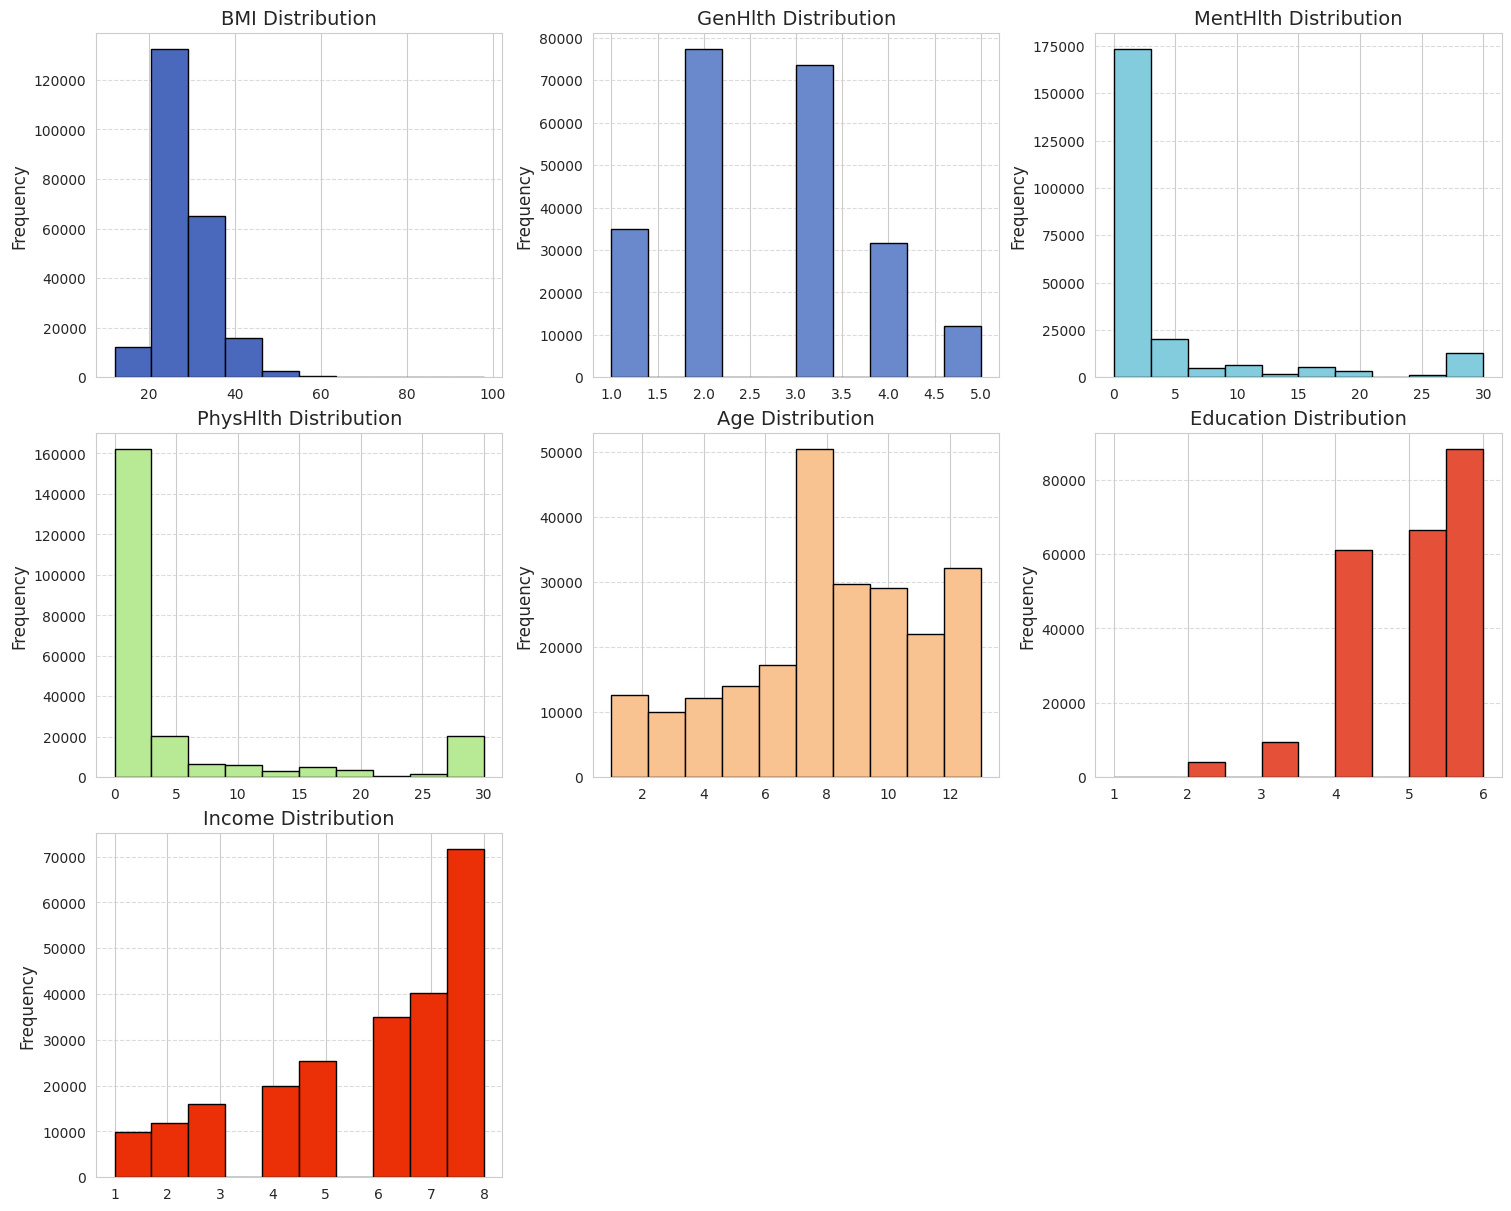

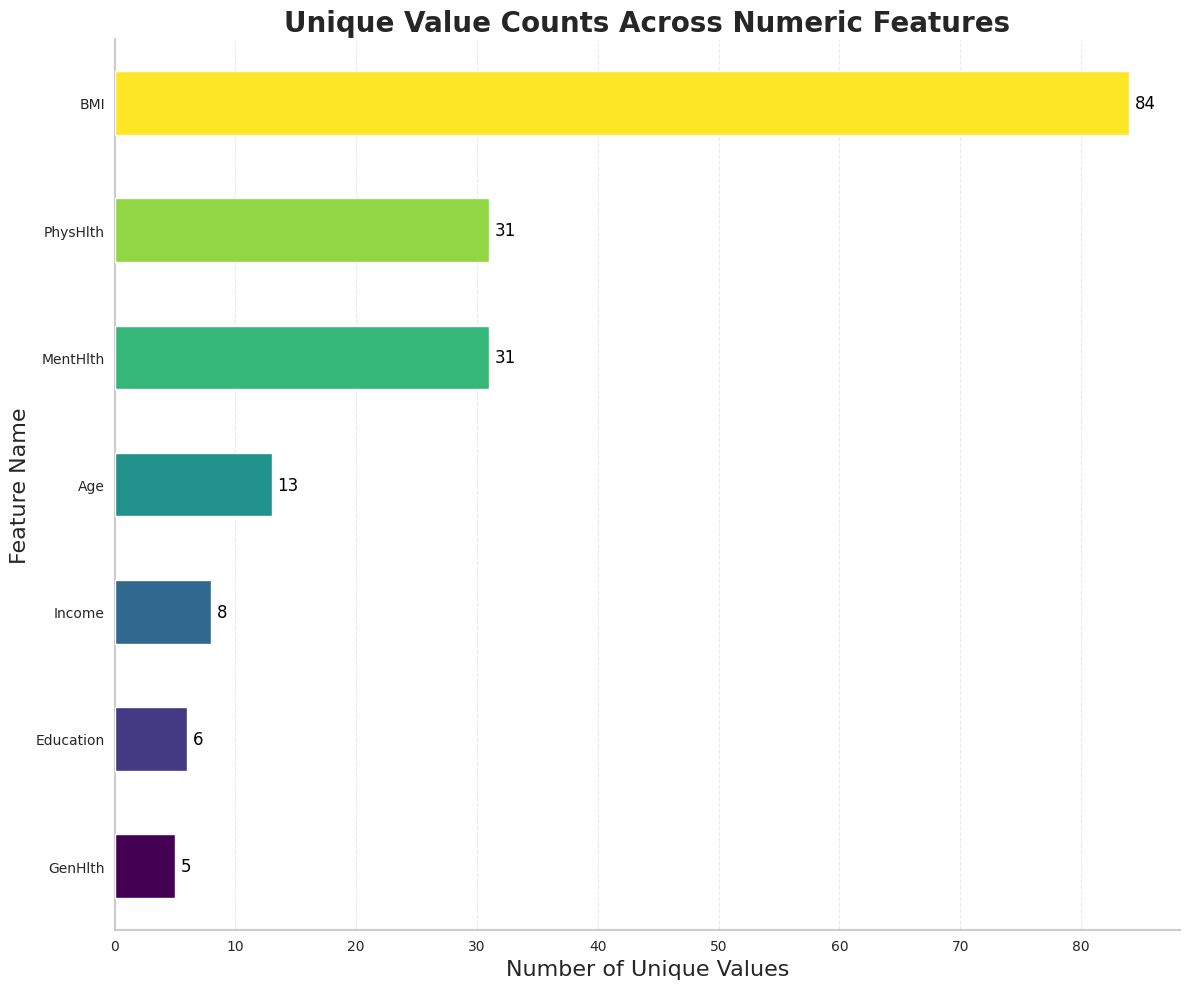

In [ ]:

# Set up a list of distinct colors for histogram visualization
histogram_colors = ['#4a69bd', '#6a89cc', '#82ccdd', '#b8e994', '#f8c291', '#e55039', '#eb2f06']

# Compute the number of rows required for displaying histograms in a 3-column format
num_rows = (len(num_variables) + 2) // 3  # Calculate the number of rows needed

# Initialize a figure and create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows), constrained_layout=True)

# Generate histograms for each numeric variable
for idx, var in enumerate(num_variables):
    # Calculate the position of the subplot
    row_idx = idx // 3
    col_idx = idx % 3

    # Access the appropriate subplot
    ax = axes[row_idx, col_idx]

    # Select a color for the histogram
    color = histogram_colors[idx % len(histogram_colors)]

    # Plot the histogram for the current variable
    df[var].hist(ax=ax, color=color, edgecolor='black')

    # Set the title and axis labels
    ax.set_title(f'{var} Distribution', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove any empty subplots if the grid is not fully utilized
for unused_subplot in range(idx + 1, num_rows * 3):
    fig.delaxes(axes[unused_subplot // 3, unused_subplot % 3])

# Render the histograms
plt.show()

# Compute unique value counts for each numeric column
value_counts = df[num_variables].nunique().sort_values()

# Generate a colormap for the bar plot
colors_for_bars = plt.cm.viridis(np.linspace(0, 1, len(value_counts)))

# Create a horizontal bar chart to show unique value counts
fig, ax = plt.subplots(figsize=(12, 10))
value_counts.plot(kind='barh', color=colors_for_bars, zorder=3, ax=ax)

# Customize the bar chart appearance
ax.spines[['top', 'right']].set_visible(False)  # Hide top and right borders
ax.spines[['left', 'bottom']].set_linewidth(1.5)  # Highlight left and bottom borders
ax.xaxis.grid(True, linestyle='--', alpha=0.4)  # Add grid lines on x-axis
ax.yaxis.grid(False)  # Disable grid lines on y-axis

# Annotate bars with their values
for position, count in enumerate(value_counts):
    ax.text(count + 0.5, position, f'{count}', va='center', fontsize=12, color='black')

# Add titles and labels to the plot
plt.title('Unique Value Counts Across Numeric Features', fontsize=20, weight='bold')
plt.xlabel('Number of Unique Values', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)

# Adjust layout to ensure a tidy fit
plt.tight_layout()

# Display the final bar chart
plt.show()


**Customized Correlation Heatmap Visualization(Relationship between Variables)**

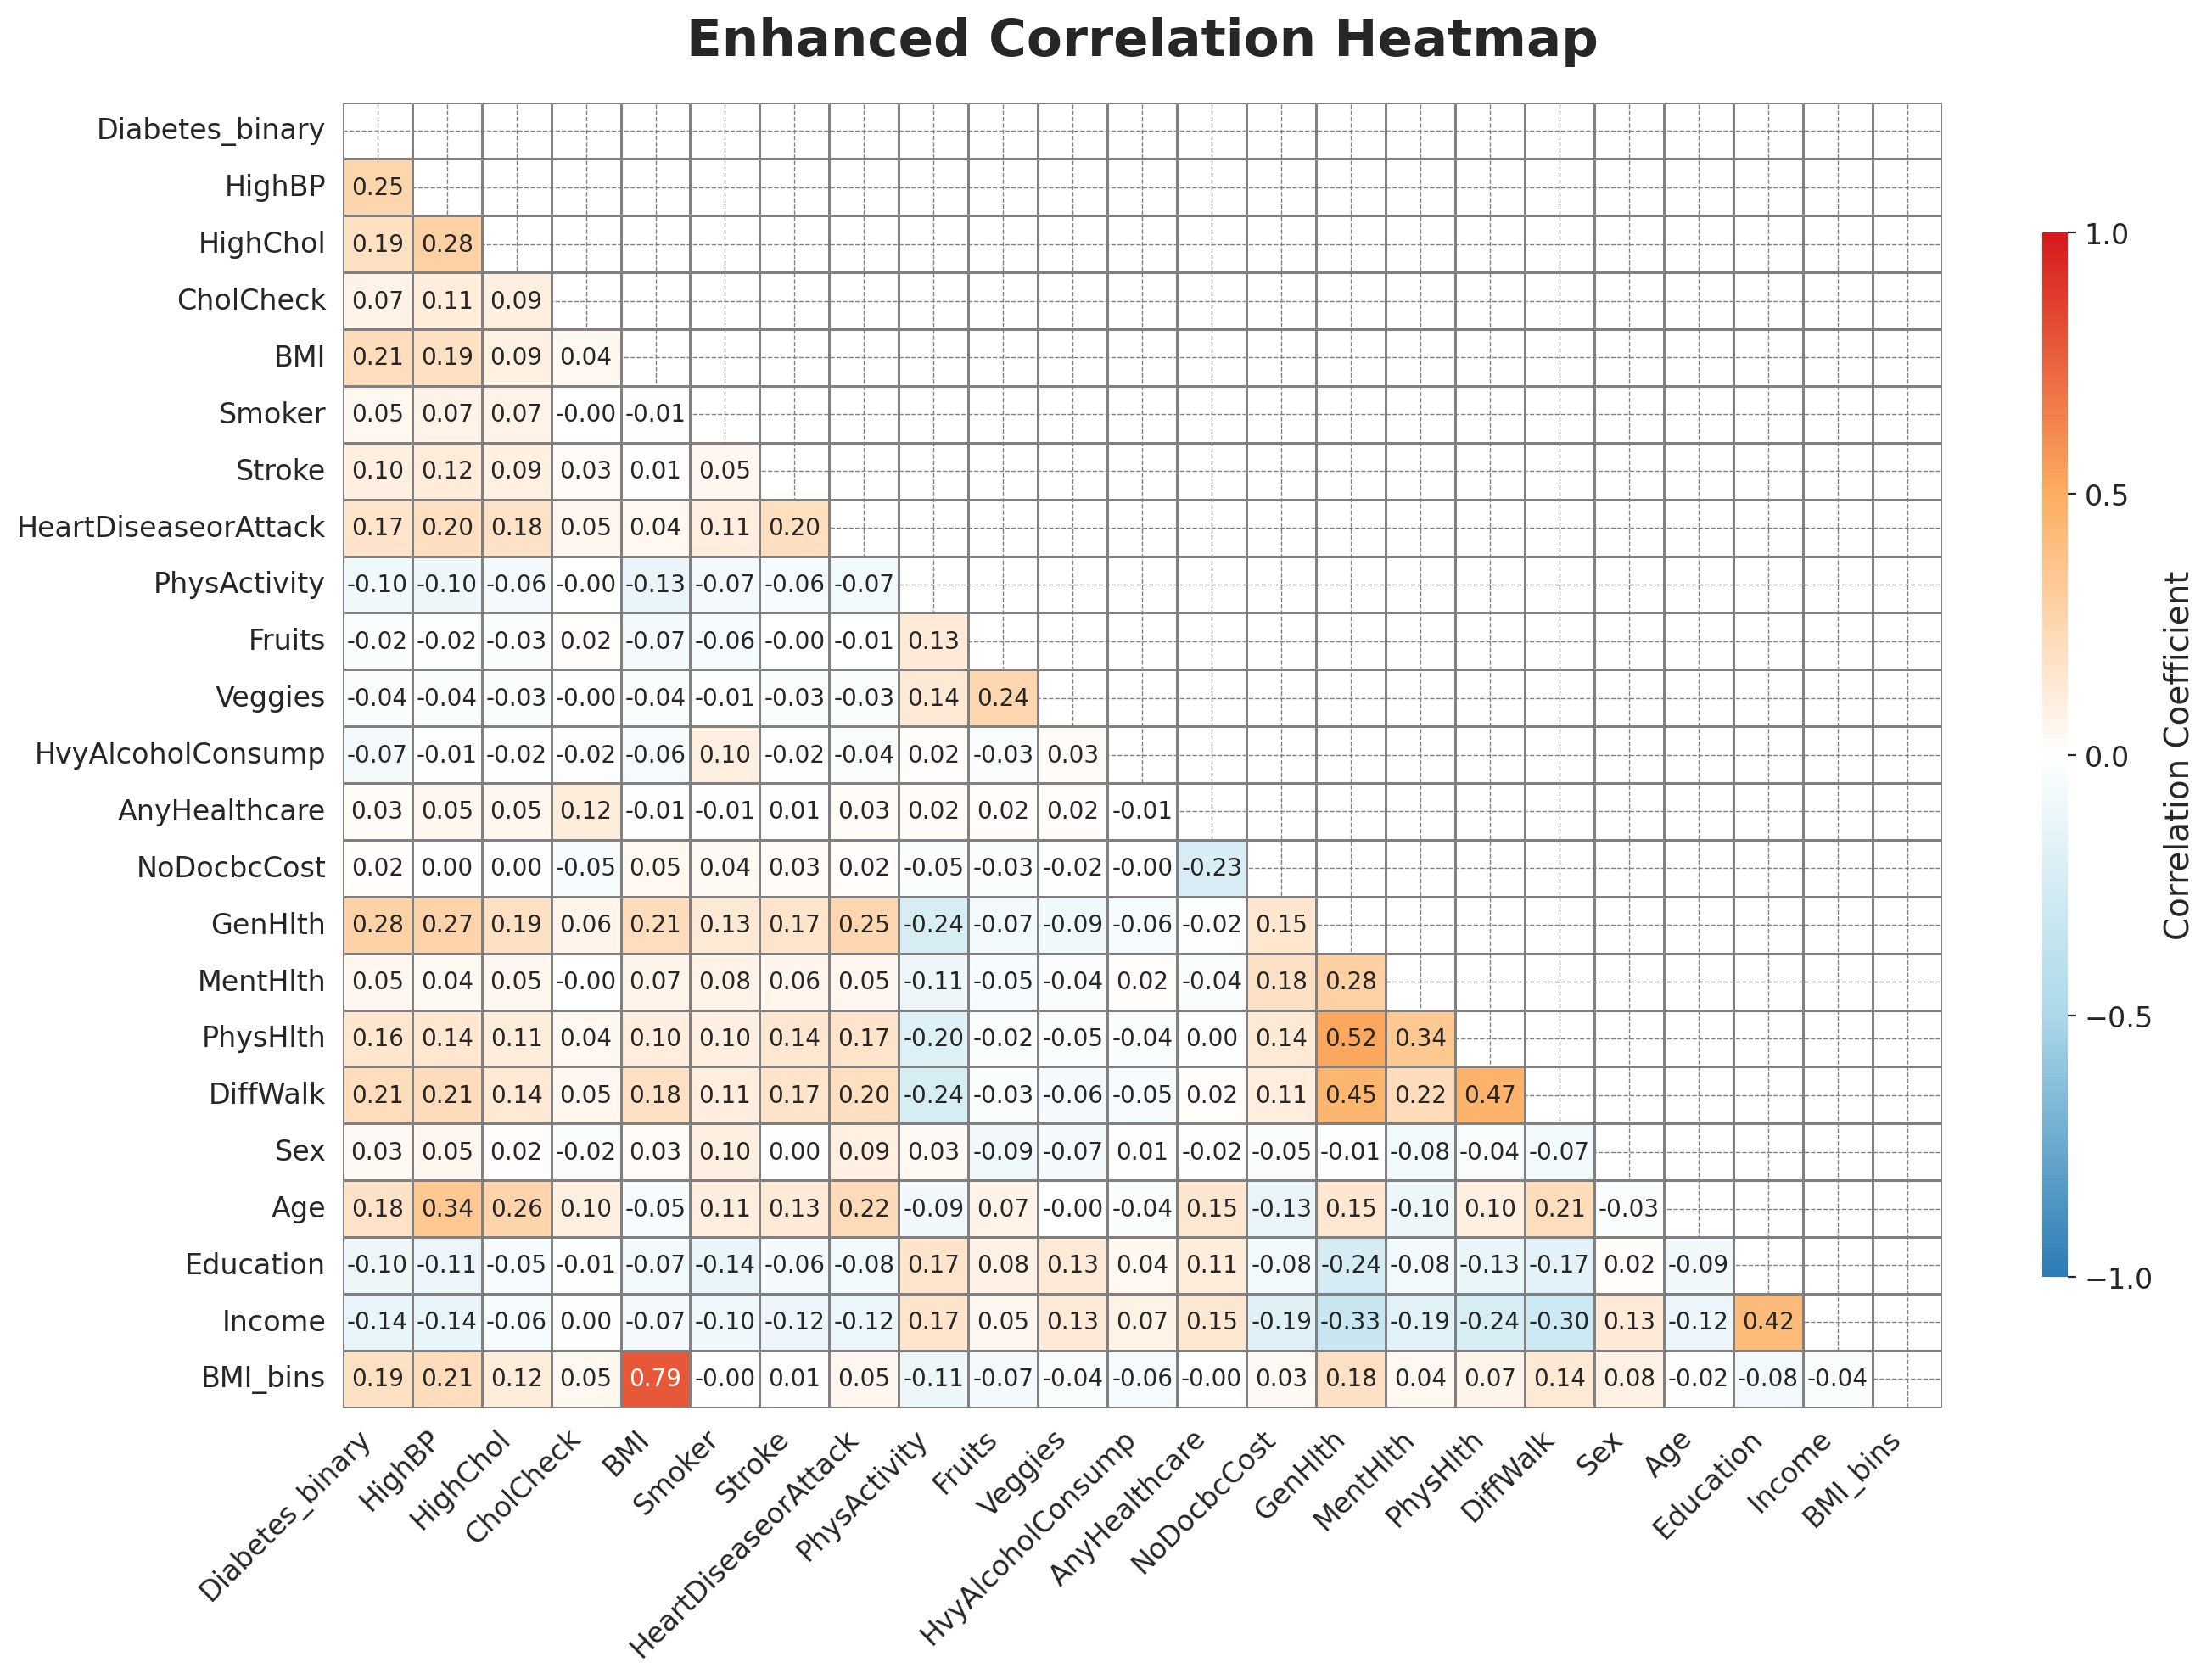

In [ ]:
# Import necessary libraries for plotting and numerical operations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

# Create a new DataFrame for heatmap visualization based on the original DataFrame
heatmap_data = df.copy()

# Define a new custom color map using a diverging scheme
custom_color_map = mpl.colors.LinearSegmentedColormap.from_list(
    'custom_diverging', ['#2c7bb6', '#abd9e9', '#ffffff', '#fdae61', '#d7191c']
)

# Compute the correlation matrix
correlation_matrix = heatmap_data.corr()

# Generate a mask to cover the upper triangle of the correlation matrix
mask_upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define the figure size for the heatmap
figure_dimensions = (14, 10)  # Width and Height in inches
fig, ax = plt.subplots(figsize=figure_dimensions, dpi=200)

# Generate the heatmap using the updated color map and include detailed annotations
heatmap_plot = sns.heatmap(correlation_matrix, cmap=custom_color_map, mask=mask_upper_triangle, annot=True, fmt='.2f',
                          vmin=-1, vmax=1, linewidths=0.5, linecolor='gray',
                          cbar_kws={'shrink': 0.8, 'ticks': [-1, -0.5, 0, 0.5, 1], 'aspect': 40})

# Set the title of the heatmap with specified font size and weight
heatmap_plot.set_title('Enhanced Correlation Heatmap', fontdict={'fontsize': 22, 'weight': 'bold'}, pad=20)

# Adjust the size and rotation of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(ax.yaxis.get_majorticklabels(), fontsize=12)

# Customize the color bar with horizontal orientation
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=12)  # Size of color bar tick labels
colorbar.set_label('Correlation Coefficient', size=14)
colorbar.ax.tick_params(direction='out')

# Hide the spines to clean up the plot
for spine in ax.spines.values():
    spine.set_visible(False)

# Add grid lines to enhance readability
ax.grid(which='major', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Final adjustments for layout
plt.tight_layout()
plt.show()


**Analysis of Feature Correlation with Diabetes Binary Outcome (Target)**

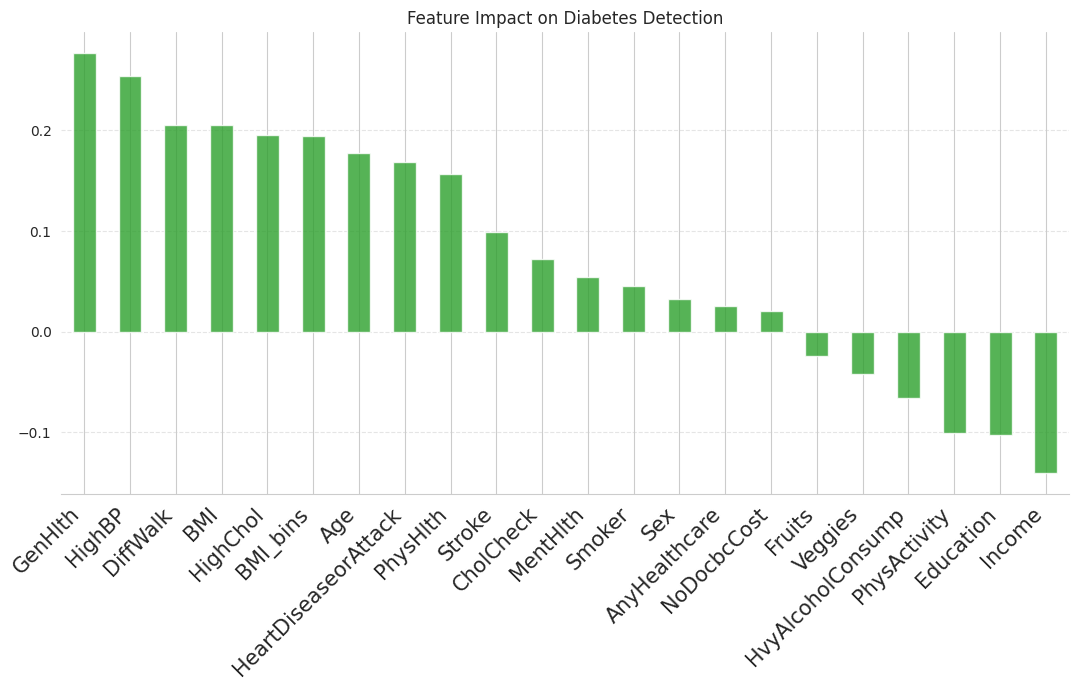

<ipython-input-39-32c3f1a787be>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relevant_correlations.index, y=relevant_correlations.values, palette=color_scheme)
<ipython-input-39-32c3f1a787be>:32: UserWarning: 
The palette list has fewer values (6) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=relevant_correlations.index, y=relevant_correlations.values, palette=color_scheme)


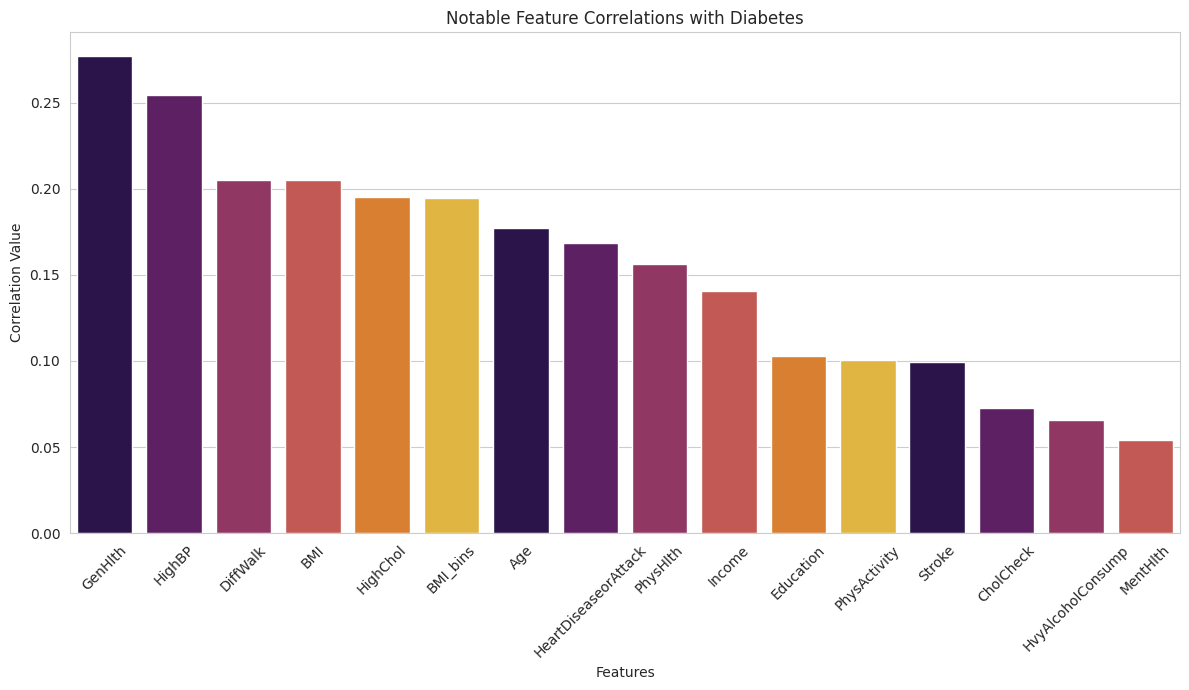

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation of each feature with the 'Diabetes_binary' outcome
feature_corr = df.drop(columns='Diabetes_binary').corrwith(df['Diabetes_binary']).sort_values(ascending=False)

# Choose a custom shade for the bar visualization
highlight_shade = '#2ca02c'  # A green hue for the bars

# Create a bar plot to visualize how features correlate with 'Diabetes_binary'
plot = feature_corr.plot(kind='bar', figsize=(13, 6), color=highlight_shade, title="Feature Impact on Diabetes Detection", alpha=0.8, zorder=3)

# Enhance visual style of the plot
plot.spines[['top', 'right', 'left']].set_visible(False)  # Remove the top, right, and left borders
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add a dashed grid to the y-axis
plt.xticks(rotation=45, ha='right', fontsize=15)  # Rotate x-axis labels for improved readability

# Display the plot
plt.show()

# Calculate the absolute values of Pearson correlation coefficients
absolute_pearson_corr = df.drop(columns='Diabetes_binary').corrwith(df['Diabetes_binary']).abs().sort_values(ascending=False)

# Extract correlations above a certain threshold
relevant_correlations = absolute_pearson_corr[absolute_pearson_corr > 0.05]

# Select a distinct color scheme for the bar chart
color_scheme = sns.color_palette("inferno")  # Using the 'inferno' color palette for variation

# Create a bar chart to visualize the filtered correlations with the chosen color scheme
plt.figure(figsize=(12, 7))
sns.barplot(x=relevant_correlations.index, y=relevant_correlations.values, palette=color_scheme)

# Add descriptive titles and labels to the plot
plt.title('Notable Feature Correlations with Diabetes')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.tight_layout()  # Adjust layout to ensure all elements are properly positioned

# Show the plot
plt.show()


**Visualizing and Sorting Pearson Correlation with Target Variable**

<ipython-input-40-c2e2743941cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_corr.values, y=feature_corr.index, palette="cividis")


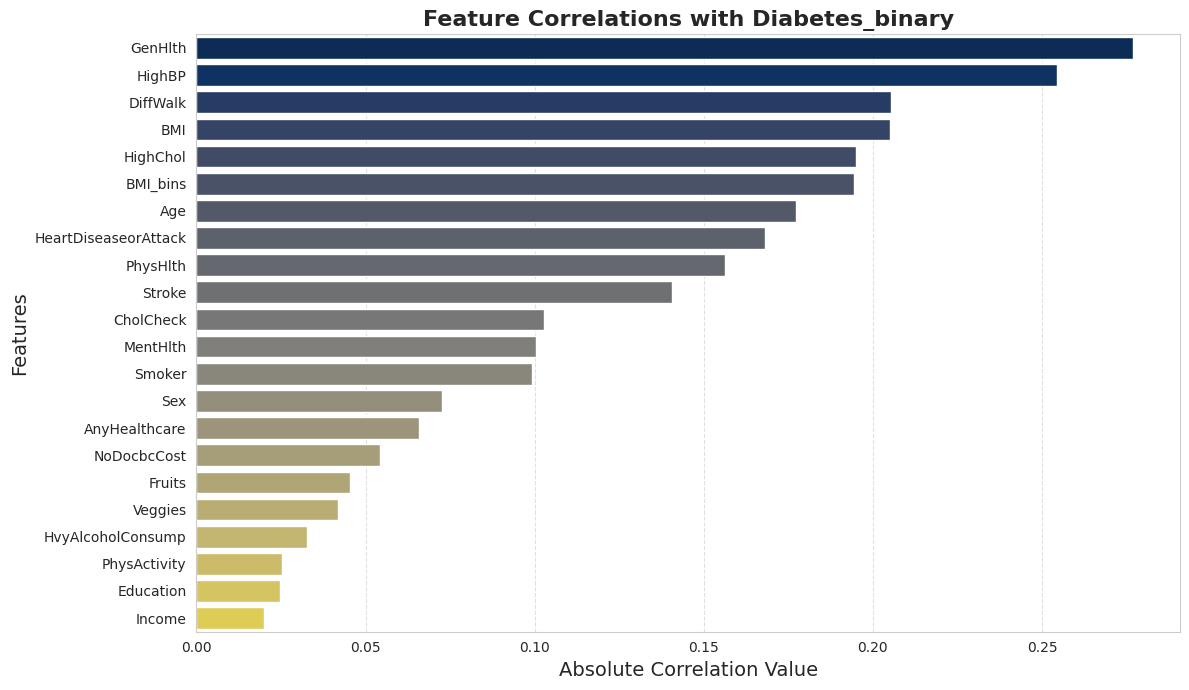

,0
GenHlth,0.276940
HighBP,0.254318
DiffWalk,0.205302
BMI,0.205086
HighChol,0.194944
BMI_bins,0.194376
Age,0.177263
HeartDiseaseorAttack,0.168213
PhysHlth,0.156211
Income,0.140659


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the absolute Pearson correlation coefficients of each feature
absolute_corr = df.drop(columns='Diabetes_binary').corrwith(df['Diabetes_binary']).abs().sort_values(ascending=False)

# Plot the absolute Pearson correlation coefficients
plt.figure(figsize=(12, 7))
sns.barplot(x=absolute_corr.values, y=feature_corr.index, palette="cividis")

# Enhance the plot with a title and labels
plt.title('Feature Correlations with Diabetes_binary', fontsize=16, weight='bold')
plt.xlabel('Absolute Correlation Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust layout to ensure no clipping of labels
plt.show()

# Output the sorted absolute correlation values
sorted_abs_corr = absolute_corr.sort_values(ascending=False)
sorted_abs_corr


**1. Identify Features with Notable Correlation to 'Diabetes_binary' (Pearson Correlation Test)**

In [ ]:
# Extract for Features with Strong Correlation to 'Diabetes_binary'
significant_correlations = absolute_corr[absolute_corr > 0.05]

# Show the filtered correlations
significant_correlations


,0
GenHlth,0.276940
HighBP,0.254318
DiffWalk,0.205302
BMI,0.205086
HighChol,0.194944
BMI_bins,0.194376
Age,0.177263
HeartDiseaseorAttack,0.168213
PhysHlth,0.156211
Income,0.140659


**2.  Chi Square Test**

In [ ]:
# Prepare feature matrix (X) and target variable (y)
feature_matrix = df.drop(columns='Diabetes_binary')
target_variable = df['Diabetes_binary']

# Calculate Chi-squared statistics and corresponding p-values
chi2_values, p_value_list = chi2(feature_matrix, target_variable)

# Assemble a DataFrame to display Chi-squared values and p-values
chi_sq_summary = pd.DataFrame({
    'ChiSquared_Value': chi2_values,
    'P_Value': p_value_list
}, index=feature_matrix.columns)

# Arrange the DataFrame by sorting Chi values from highest to lowest
chi_sq_summary.sort_values(by='ChiSquared_Value', ascending=False, inplace=True)

# Output values
chi_sq_summary


,ChiSquared_Value,P_Value
PhysHlth,97988.761672,0.000000e+00
BMI,15507.736174,0.000000e+00
MentHlth,11419.584750,0.000000e+00
Age,8539.906340,0.000000e+00
HighBP,8098.548237,0.000000e+00
DiffWalk,7875.496177,0.000000e+00
GenHlth,7671.732832,0.000000e+00
HeartDiseaseorAttack,5822.145697,0.000000e+00
HighChol,4869.312739,0.000000e+00
Income,3377.099257,0.000000e+00


**3. Calculating and Displaying Mutual Information Scores**

In [ ]:
# Calculate mutual information between features and the target
m_information_scores = mutual_info_classif(feature_matrix[bool_variables], target_variable)

# Organize the mutual information scores into DataFrame
m_information_df = pd.DataFrame({
    'Mutual Information Score': m_information_scores
}, index=feature_matrix[bool_variables].columns)

# Arrange the DataFrame by mutual information scores in descending order
ranked_m_info = m_information_df.sort_values(by='Mutual Information Score', ascending=False)

# Display the ordered mutual information scores
ranked_m_info


,Mutual Information Score
HighBP,0.051403
AnyHealthcare,0.047476
CholCheck,0.044712
PhysActivity,0.042508
HighChol,0.037556
Veggies,0.037050
Fruits,0.034299
Smoker,0.024461
DiffWalk,0.021830
Sex,0.020320


**4. Performing and Displaying P-values and F-test statistics Results**

In [ ]:
# Calculating values
t_scores = f_regression(feature_matrix, target_variable)

# Assemble the F-test results into a DataFrame
t_results_df = pd.DataFrame({
    'F_Statistic': t_scores[0],
    'P_Value': t_scores[1]
}, index=feature_matrix.columns)

# Arrange the DataFrame in descending order according to F-values
sorted_t_results = t_results_df.sort_values(by='F_Statistic', ascending=False)

# Print results
sorted_t_results


,F_Statistic,P_Value
GenHlth,19061.436601,0.000000e+00
HighBP,15868.017696,0.000000e+00
DiffWalk,10097.616798,0.000000e+00
BMI,10075.425186,0.000000e+00
HighChol,9065.177413,0.000000e+00
BMI_bins,9010.331905,0.000000e+00
Age,7444.458687,0.000000e+00
HeartDiseaseorAttack,6682.140008,0.000000e+00
PhysHlth,5739.591424,0.000000e+00
Income,4631.714144,0.000000e+00


**5. Conducting and Displaying ANOVA F-test Results**

In [ ]:
# Perform ANOVA F-test and obtain values
anova_output = f_classif(feature_matrix[num_variables], target_variable)

# Compile the ANOVA results into a DataFrame
Result_df = pd.DataFrame({
    'F_Statistic': anova_output[0],
    'P_Value': anova_output[1]
}, index=feature_matrix[num_variables].columns)

# Arrange the DataFrame based on F-statistic values from highest to lowest
sorted_results = Result_df.sort_values(by='F_Statistic', ascending=False)

# Show output
sorted_results

,F_Statistic,P_Value
GenHlth,19061.433726,0.000000e+00
BMI,10163.821697,0.000000e+00
Age,7444.479505,0.000000e+00
PhysHlth,5739.701978,0.000000e+00
Income,4631.703286,0.000000e+00
Education,2445.635014,0.000000e+00
MentHlth,674.909059,1.405305e-148


 **Model Preparation**

In [ ]:
# Function to remove duplicate entries and reset the DataFrame index
def remove_duplicates_and_reset(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    clean_df = df.copy()
    # Drop duplicate rows and reset the index to ensure a clean, sequential index
    clean_df = clean_df.drop_duplicates().reset_index(drop=True)
    return clean_df

# Columns selected from the original experiment focused on BMI and related health factors
selected_columns = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                    'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
                    'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

# Extract feature variables (X) and the target label (y)
X = df[selected_columns]
y = df['Diabetes_binary']

# Clean data by eliminating duplicates and resetting its index
df2_cleaned = remove_duplicates_and_reset(dataf2)

# Isolate the target variable from the cleaned dataset
df2_y = df2_cleaned['Diabetes_binary']

# Extract the same set of feature variables as the primary dataset
df2_X = df2_cleaned[selected_columns]

# Initialize a StandardScaler for normalizing feature values
scaler = StandardScaler()
# Fit the scaler to the features of the primary dataset to compute the necessary scaling parameters
scaler.fit(X)

# Apply the learned scaling parameters to standardize the features of the cleaned secondary dataset
df2_X_scaled = scaler.transform(df2_X)


**1. Accuracy for Imbalanced Dataset**

In [ ]:
# Evaluate baseline model: predicting all instances as non-diabetic

# Compute the accuracy and AUC for a simple baseline model that predicts only the majority class (0)
baseline_accuracy = accuracy_score(y, np.zeros_like(y))
baseline_auc = roc_auc_score(y, np.zeros_like(y))

# Output performance metrics of the baseline model
print(f'Baseline model (all 0 predictions) accuracy: {baseline_accuracy:.4f}')
print(f'Baseline model AUC: {baseline_auc:.4f} on the imbalanced dataset')


Baseline model (all 0 predictions) accuracy: 0.8471
Baseline model AUC: 0.5000 on the imbalanced dataset


**2. Accuracy for Balanced Dataset**

In [ ]:
# Assess the performance of a simplistic baseline model on an unseen balanced dataset
# This model naively predicts 'no diabetes' (0) for all instances
baseline_accuracy = accuracy_score(df2_y, np.zeros_like(df2_y))
baseline_auc = roc_auc_score(df2_y, np.zeros_like(df2_y))

# Display accuracy and AUC for this baseline approach
print(f'Baseline model (predicting all 0) accuracy: {baseline_accuracy:.4f}')
print(f'Baseline model AUC: {baseline_auc:.4f} on the unseen balanced dataset')


Baseline model (predicting all 0) accuracy: 0.8471
Baseline model AUC: 0.5000 on the unseen balanced dataset


**Machine Learning Models**

**Models implementation**

In [ ]:
# Instantiate various machine learning models with consistent random state for reproducibility
rdf_classifier = RandomForestClassifier(random_state=508312)

gradient_boosting = GradientBoostingClassifier(random_state=508312)

xgboost_classifier = XGBClassifier(random_state=508312)

knn_classifier = KNeighborsClassifier()

catboost_classifier = CatBoostClassifier(random_state=508312, verbose=False)

logistic_regression = LogisticRegression(max_iter=500, random_state=508312)


**Model Performance Evaluation: Training and Testing Classification**

In [ ]:
def evaluate_models(clf_names, clf_list):
    """
    Evaluates multiple classifiers by training them on the provided training data,
    testing them on both the testing set and an unseen dataset, and returns a DataFrame
    summarizing key performance metrics (accuracy, AUC, RMSE) for each stage.

    Parameters:
    clf_names (list): List of classifier names.
    clf_list (list): List of classifier objects.

    Returns:
    pd.DataFrame: A DataFrame containing the evaluation metrics for each model.
    """
    # Initialize a list to store performance metrics for each classifier
    model_metrics = []

    # Iterate over the classifiers and evaluate their performance
    for idx, clf in enumerate(clf_list):

        # Train the classifier on the training data
        clf.fit(X_train, y_train)

        # Evaluate performance
        y_train_pred = clf.predict(X_train)
        y_train_proba = clf.predict_proba(X_train)[:, 1]
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_auc = roc_auc_score(y_train, y_train_proba)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

        # Evaluate performance
        y_test_pred = clf.predict(X_test)
        y_test_proba = clf.predict_proba(X_test)[:, 1]
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_proba)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Evaluate performance
        y_unseen_pred = clf.predict(df2_X_scaled)
        y_unseen_proba = clf.predict_proba(df2_X_scaled)[:, 1]
        unseen_accuracy = accuracy_score(df2_y, y_unseen_pred)
        unseen_auc = roc_auc_score(df2_y, y_unseen_proba)
        unseen_rmse = np.sqrt(mean_squared_error(df2_y, y_unseen_pred))

        # Store the performance metrics for the current classifier
        model_metrics.append([
            clf_names[idx], train_rmse, train_auc, train_accuracy,
            test_rmse, test_auc, test_accuracy,
            unseen_rmse, unseen_auc, unseen_accuracy
        ])

    # Convert the metrics list into a DataFrame for easy interpretation
    results_info = pd.DataFrame(model_metrics, columns=[
        'Model', 'Train_RMSE', 'Train_AUC', 'Train_Accuracy',
        'Test_RMSE', 'Test_AUC', 'Test_Accuracy',
        'Unseen_RMSE', 'Unseen_AUC', 'Unseen_Accuracy'
    ])

    return results_info


**Prediction with imbalanced dataset**

Original target variable distribution:
Diabetes_binary
1     35097
0    194377
Name: count, dtype: int64



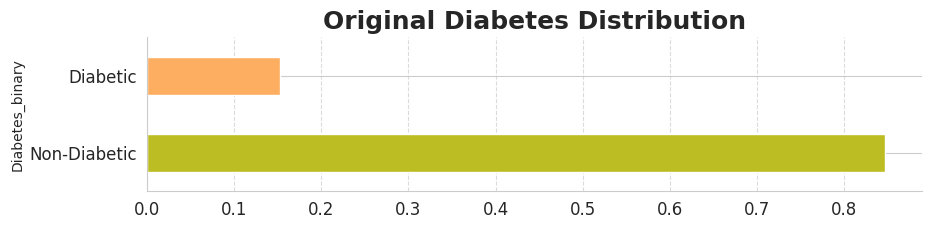

Training set target variable distribution:
Diabetes_binary
1     28152
0    155427
Name: count, dtype: int64



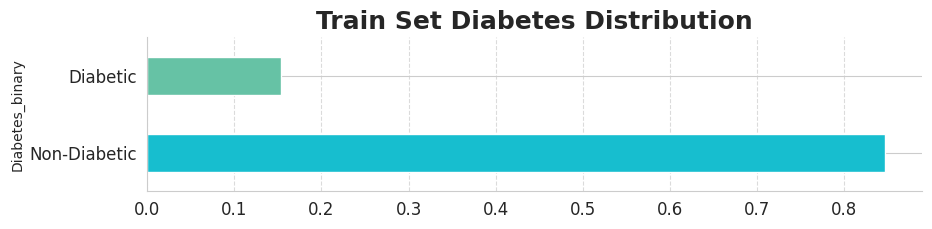


Evaluating classifiers on the imbalanced dataset:
Results on imbalanced dataset:
                 Model  Train_RMSE  Train_AUC  Train_Accuracy  Test_RMSE  \
0        Random_Forest    0.124094   0.998331        0.984601   0.401734   
1    Gradient_Boosting    0.382573   0.814766        0.853638   0.381167   
2              XgBoost    0.370941   0.838730        0.862403   0.382109   
3          K_Neighbors    0.352540   0.894937        0.875716   0.408457   
4             CatBoost    0.366190   0.840380        0.865905   0.380938   
5  Logistic_Regression    0.387848   0.803984        0.849574   0.385176   

   Test_AUC  Test_Accuracy  Unseen_RMSE  Unseen_AUC  Unseen_Accuracy  
0  0.763948       0.838610     0.211182    0.968769         0.955402  
1  0.814096       0.854712     0.382292    0.814629         0.853853  
2  0.810141       0.853993     0.373202    0.833080         0.860721  
3  0.708677       0.833163     0.364410    0.858047         0.867205  
4  0.812399       0.854886    

In [ ]:
# Split the dataset into training and testing sets BEFORE applying scaling
X_train, X_test, y_train, y_test = train_test_split(
    X,  # 'X' refers to the original feature set, used for fitting the scaler later
    y,  # 'y' is the target variable
    test_size=0.2,  # Allocate 20% of the data for testing
    random_state=508312  # Set random state for reproducibility
)

# Fit the scaler on the training data and apply the same transformation to both training and testing sets
scaler.fit(X_train)  # The scaler is trained on the training data ONLY
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Ensure the unseen dataset (df2_X) has consistent features with the training data
# Identify any missing columns in df2_X compared to the original training data
missing_cols = set(X.columns) - set(df2_X.columns)

# Add any missing columns to df2_X, filling them with zeros or another appropriate default value
for col in missing_cols:
    df2_X[col] = 0

# Reorder the columns of df2_X to exactly match the order of columns in X
df2_X = df2_X[X.columns]

# Apply the same scaling to data
df2_X_scaled = scaler.transform(df2_X)

# Display
print("Original target variable distribution:")
print(y.value_counts(ascending=True))
print()
y.value_counts(1).plot(kind='barh', figsize=(10, 2), color=['#bcbd22', '#fdae61']).spines[['top', 'right']].set_visible(False)
plt.title('Original Diabetes Distribution', fontsize=18, fontweight='bold')
plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'], fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Display and visualize
print("Training set target variable distribution:")
print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh', figsize=(10, 2), color=['#17becf', '#66c2a5']).spines[['top', 'right']].set_visible(False)
plt.title('Train Set Diabetes Distribution', fontsize=18, fontweight='bold')
plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'], fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Define the list of classifier names and their corresponding model objects
clf_names = ['Random_Forest', 'Gradient_Boosting', 'XgBoost', 'K_Neighbors', 'CatBoost', 'Logistic_Regression']
clf_list = [rdf_classifier, gradient_boosting,  xgboost_classifier, knn_classifier,  catboost_classifier, logistic_regression]

# Evaluate the classifiers on the imbalanced dataset and display the results
print("\nEvaluating classifiers on the imbalanced dataset:")
imbalanced_perf = evaluate_models(clf_names, clf_list)

print('Results on imbalanced dataset:')
print(imbalanced_perf)


**Comparison of Model Analysis**

<ipython-input-52-979f3538b86a>:26: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Metric', y='Value', hue='Model', data=df_long, palette=custom_palette)


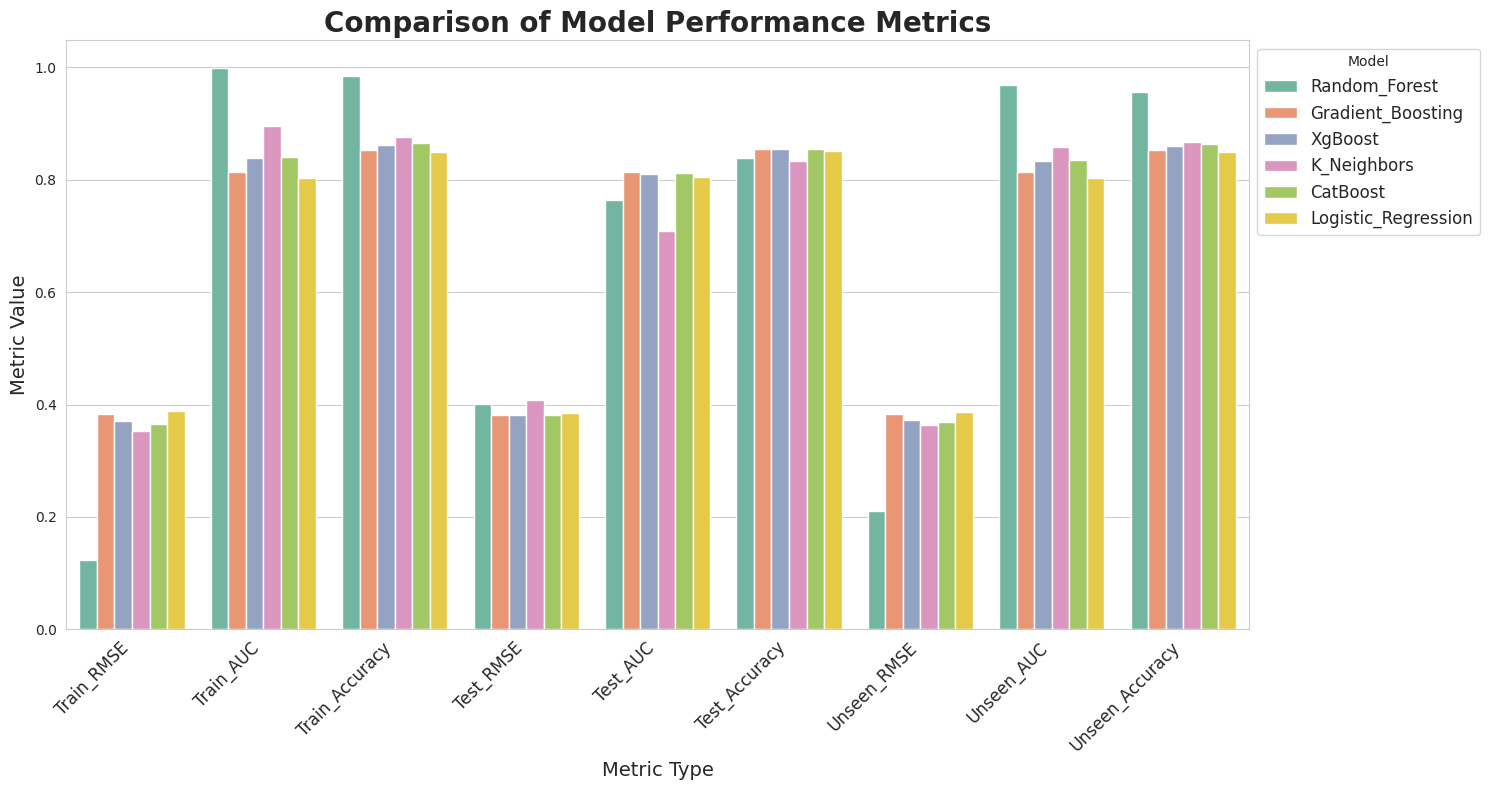

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_performance_comparison(df):
    """
    Visualizes a comparison of different machine learning models' performance metrics.

    Parameters:
    df (pd.DataFrame): A DataFrame containing performance metrics for different models.
                       Each row corresponds to a model, with columns representing various metrics.

    The function reshapes the DataFrame for easy visualization and uses Seaborn to create
    a bar plot comparing the metrics across models.

    Returns:
    None: Displays a bar plot comparing model performances.
    """
    # Reshape
    df_long = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

    # Define a custom color palette for the models
    custom_palette = sns.color_palette("Set2")  # Example using a predefined Seaborn color palette

    # Create the bar plot to compare model performance across different metrics
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Metric', y='Value', hue='Model', data=df_long, palette=custom_palette)

    # Customize the plot with a title, axis labels, and legend placement
    plt.title('Comparison of Model Performance Metrics', fontsize=20, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Metric Value', fontsize=14)
    plt.xlabel('Metric Type', fontsize=14)
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.tight_layout()
    plt.show()

# plotting
plot_model_performance_comparison(imbalanced_perf)


**Prediction using Near Miss**

Original target variable distribution:
Diabetes_binary
1     35097
0    194377
Name: count, dtype: int64



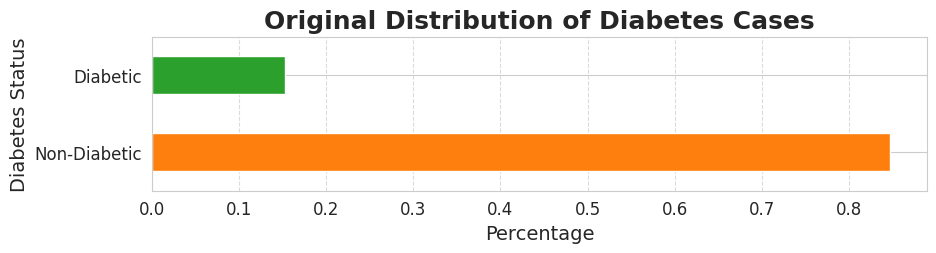

Training set distribution after NearMiss:
Diabetes_binary
0    28152
1    28152
Name: count, dtype: int64



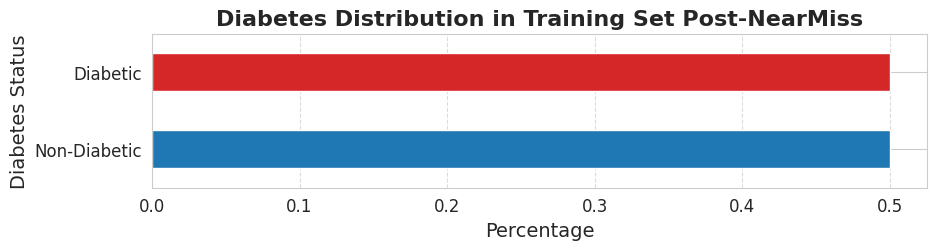


Evaluating classifier performance on the NearMiss balanced dataset:

Evaluating classifiers on the NearMiss_perf balanced dataset:
Performance metrics on NearMiss dataset:
                 Model  Train_RMSE  Train_AUC  Train_Accuracy  Test_RMSE  \
0        Random_Forest    0.213813   0.993823        0.954284   0.791680   
1    Gradient_Boosting    0.370024   0.924428        0.863083   0.764446   
2              XgBoost    0.345654   0.936676        0.880524   0.799526   
3          K_Neighbors    0.379642   0.943321        0.855872   0.677933   
4             CatBoost    0.341674   0.939990        0.883259   0.804498   
5  Logistic_Regression    0.392568   0.909701        0.845890   0.714319   

   Test_AUC  Test_Accuracy  Unseen_RMSE  Unseen_AUC  Unseen_Accuracy  
0  0.608914       0.373243     0.772641    0.668553         0.403026  
1  0.623740       0.415623     0.763874    0.621892         0.416496  
2  0.561789       0.360758     0.797765    0.562597         0.363571  
3  0.63730

In [ ]:
from imblearn.under_sampling import NearMiss

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Feature set
    y,  # Target variable
    test_size=0.2,  # 20% of data reserved for testing
    random_state=508312  # Ensure reproducibility
)

# Apply the NearMiss undersampling technique to balance the training data
nm = NearMiss(version=1, n_neighbors=10)  # Initialize NearMiss with specified version and neighbors
X_train, y_train = nm.fit_resample(X_train, y_train)  # Resample the training data to balance classes

# Scale the features of the training and testing sets using the fitted scaler
X_train = scaler.transform(X_train)  # Transform the training features
X_test = scaler.transform(X_test)    # Transform the testing features

# Print and visualize the distribution of the target variable in the original dataset
print("Original target variable distribution:")
print(y.value_counts(ascending=True))
print()

# Plot the original distribution of target variable
y.value_counts(normalize=True).plot(kind='barh', figsize=(10, 2), color=['#ff7f0e', '#2ca02c'])
plt.title('Original Distribution of Diabetes Cases', fontsize=18, fontweight='bold')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Diabetes Status', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'], fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Display
print("Training set distribution after NearMiss:")
print(y_train.value_counts())
print()

# Plot the distribution in the resampled training set
y_train.value_counts(normalize=True).plot(kind='barh', figsize=(10, 2), color=['#1f77b4', '#d62728'])
plt.title('Diabetes Distribution in Training Set Post-NearMiss', fontsize=16, fontweight='bold')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Diabetes Status', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'], fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Prepare to evaluate classifiers on the balanced dataset
print("\nEvaluating classifier performance on the NearMiss balanced dataset:")

# Uncomment and use the following line if you wish to evaluate models
print("\nEvaluating classifiers on the NearMiss_perf balanced dataset:")
NearMiss_perf = evaluate_models(clf_names, clf_list)

print('Performance metrics on NearMiss dataset:')
print(NearMiss_perf)


**Implementation Random Under Sampling**

Original target variable class distribution:
Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64


Diabetes_binary
0    28152
1    28152
Name: count, dtype: int64



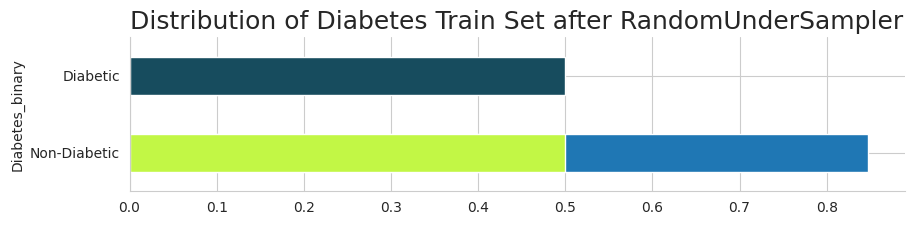



Evaluating classifiers on the RandomUnderSampler balanced dataset:
Performance Metrics for RandomUnderSampler Balanced Dataset:
RandomSampler_perf
                 Model  Train_RMSE  Train_AUC  Train_Accuracy  Test_RMSE  \
0        Random_Forest    0.117171   0.999347        0.986271   0.557882   
1    Gradient_Boosting    0.507912   0.819018        0.742025   0.542557   
2              XgBoost    0.477729   0.856768        0.771775   0.545740   
3          K_Neighbors    0.460194   0.874346        0.788221   0.571674   
4             CatBoost    0.483861   0.850449        0.765878   0.544000   
5  Logistic_Regression    0.516580   0.807241        0.733145   0.531603   

   Test_AUC  Test_Accuracy  Unseen_RMSE  Unseen_AUC  Unseen_Accuracy  
0  0.780821       0.688768     0.495163    0.926084         0.754813  
1  0.813227       0.705632     0.540949    0.814103         0.707374  
2  0.805993       0.702168     0.537226    0.826507         0.711388  
3  0.752893       0.673189     0.5

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Feature matrix
    y,  # Target vector
    test_size=0.2,  # Reserve 20% of data for testing
    random_state=508312  # Seed for reproducibility
)

# Apply RandomUnderSampler to balance the classes in the training set
rus = RandomUnderSampler(sampling_strategy='auto', random_state=508312)  # Automatically balance classes
X_train, y_train = rus.fit_resample(X_train, y_train)  # Resample training data to achieve class balance

# Normalize the feature values using the pre-defined scaler
X_train = scaler.transform(X_train)  # Apply scaling to training features
X_test = scaler.transform(X_test)    # Apply scaling to testing features

# Display and visualize the original class distribution in the target variable
print("Original target variable class distribution:")
print(y.value_counts())
print()

# Plot
print(y.value_counts())
print()
y.value_counts(normalize=True).plot(kind='barh', figsize=(10, 2), color=['#1f77b4', '#c2f745'])
plt.title('Class Distribution in Original Diabetes Dataset', fontsize=18, fontweight='bold')
plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Percentage', fontsize=14)
print()

# Print and visualize the distribution of the target variable in the training set after RandomUnderSampler
print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh', figsize=(10, 2), color=['#c2f745', '#174c5e']).spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Diabetes Train Set after RandomUnderSampler', fontsize=18)
plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()
print()

# Evaluate classifier performance on the balanced training dataset
print("\nEvaluating classifiers on the RandomUnderSampler balanced dataset:")
RandomSampler_perf = evaluate_models(clf_names, clf_list)  # Assuming 'evaluate_models' is the function for model evaluation

print('Performance Metrics for RandomUnderSampler Balanced Dataset:')
print('RandomSampler_perf')
print(RandomSampler_perf)

**Enhancing Minority Class Representation with SMOTE (Synthetic Minority Over-sampling Technique)**

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64



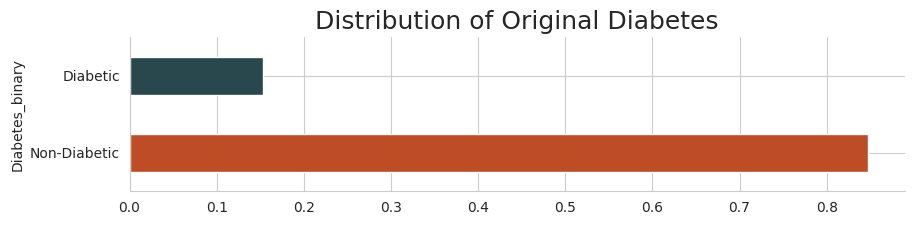


Diabetes_binary
0    155427
1    155427
Name: count, dtype: int64



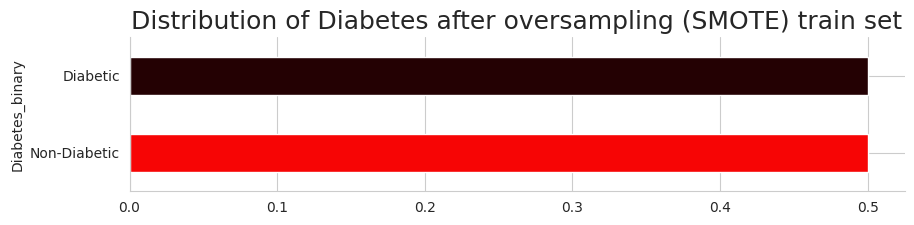



Evaluating classifiers on SMOTE-balanced dataset:

Performance metrics for classifiers after SMOTE:
SMOTE
                 Model  Train_RMSE  Train_AUC  Train_Accuracy  Test_RMSE  \
0        Random_Forest    0.115488   0.998877        0.986663   0.418522   
1    Gradient_Boosting    0.377237   0.935709        0.857692   0.407763   
2              XgBoost    0.306456   0.974216        0.906085   0.456782   
3          K_Neighbors    0.369474   0.941185        0.863489   0.398712   
4             CatBoost    0.356901   0.949338        0.872622   0.402032   
5  Logistic_Regression    0.397088   0.921379        0.842321   0.407496   

   Test_AUC  Test_Accuracy  Unseen_RMSE  Unseen_AUC  Unseen_Accuracy  
0  0.756750       0.824839     0.225076    0.965975         0.949341  
1  0.803564       0.833729     0.405503    0.803801         0.835567  
2  0.697976       0.791350     0.388186    0.857032         0.849312  
3  0.801319       0.841028     0.396966    0.807117         0.842418  
4  0

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=508312
)

# Apply SMOTE (oversampling) with a balanced sampling strategy
oversample = SMOTE(sampling_strategy=1, random_state=508312)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Scale the features using the previously defined scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Print and visualize the original distribution of the target variable
print(y.value_counts())
print()
y.value_counts(1).plot(kind='barh', figsize=(10, 2), color=['#be4d25', '#29484d']).spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Original Diabetes', fontsize=18)
plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()
print()

# Print and visualize the distribution of the target variable in the training set after oversampling (SMOTE)
print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh', figsize=(10, 2), color=['#f70505', '#240103']).spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Diabetes after oversampling (SMOTE) train set', fontsize=18)
plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()
print()

# Define a list of classifiers to evaluate
clf_names2 = ['Random_Forest', 'Gradient_Boosting', 'XgBoost', 'K_Neighbors', 'CatBoost', 'Logistic_Regression']
clf_list2 = [rdf_classifier, gradient_boosting, knn_classifier, xgboost_classifier, catboost_classifier, logistic_regression]

# Evaluate classifiers on the SMOTE-augmented training data
print("\nEvaluating classifiers on SMOTE-balanced dataset:")
print()
smote_perf = evaluate_models(clf_names2, clf_list2)

print('Performance metrics for classifiers after SMOTE:')
print('SMOTE')
print(smote_perf)

**Applying SMOTE and NearMiss for prediction**

Distribution of target variable in the original dataset:
Diabetes_binary
1     35097
0    194377
Name: count, dtype: int64



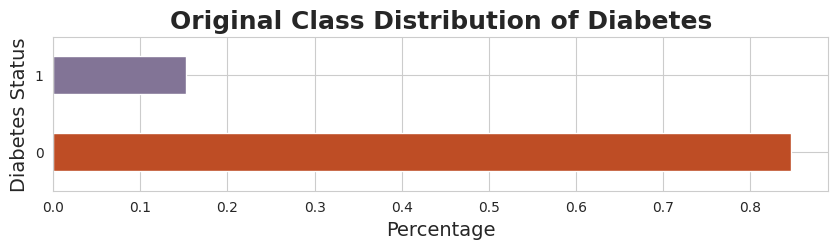

Distribution of target variable after SMOTE oversampling:
Diabetes_binary
1     62170
0    155427
Name: count, dtype: int64



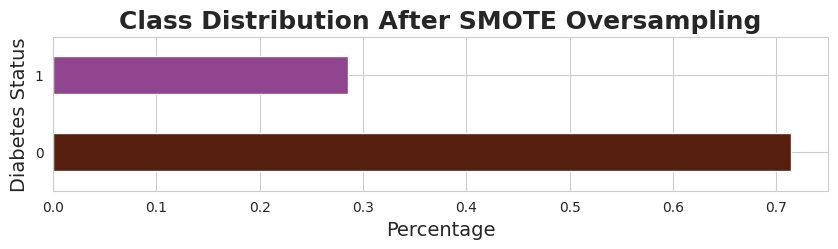

Distribution of target variable after NearMiss undersampling:
Diabetes_binary
0    62170
1    62170
Name: count, dtype: int64



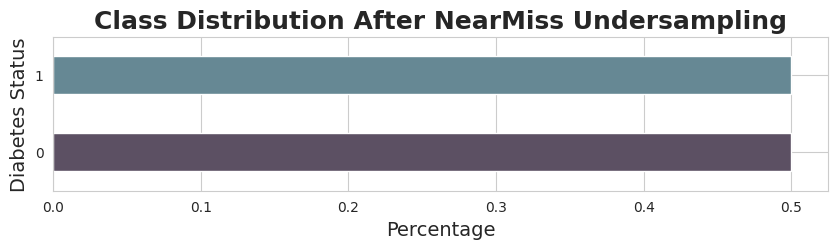


Assessing classifier performance on the resampled dataset:
Performance Results for SMOTE and NearMiss Resampled Dataset:
                 Model  Train_RMSE  Train_AUC  Train_Accuracy  Test_RMSE  \
0        Random Forest    0.162491   0.997751        0.973597   0.683725   
1    Gradient Boosting    0.371712   0.929619        0.861830   0.655480   
2              XGBoost    0.354161   0.939725        0.874570   0.682721   
3  K-Nearest Neighbors    0.341490   0.962012        0.883384   0.571464   
4             CatBoost    0.345413   0.946389        0.880690   0.690022   
5  Logistic Regression    0.398293   0.915331        0.841362   0.541411   

   Test_AUC  Test_Accuracy  Unseen_RMSE  Unseen_AUC  Unseen_Accuracy  
0  0.626527       0.532520     0.642804    0.738674         0.586803  
1  0.677786       0.570345     0.655352    0.676673         0.570513  
2  0.624369       0.533893     0.682862    0.625002         0.533699  
3  0.677101       0.673428     0.551200    0.748812         0

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=508312
)

# Employ SMOTE to balance the class distribution by oversampling
smote = SMOTE(sampling_strategy=0.4, random_state=508312)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply NearMiss to further balance the dataset by undersampling
near_miss = NearMiss(version=1, n_neighbors=10)
X_train, y_train = near_miss.fit_resample(X_train_smote, y_train_smote)

# Normalize training and testing
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Display
print("Distribution of target variable in the original dataset:")
print(y.value_counts(ascending=True))
print()

# Plot the class distribution of the original dataset
y.value_counts(normalize=True).plot(kind='barh', figsize=(10, 2), color=['#be4d25', '#827496'])
plt.title('Original Class Distribution of Diabetes', fontsize=18, fontweight='bold')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Diabetes Status', fontsize=14)
plt.show()

# Display and plot distribution
print("Distribution of target variable after SMOTE oversampling:")
print(y_train_smote.value_counts(ascending=True))
print()

# Plot the class distribution of the training set after SMOTE
y_train_smote.value_counts(normalize=True).plot(kind='barh', figsize=(10, 2), color=['#54200d', '#8f468e'])
plt.title('Class Distribution After SMOTE Oversampling', fontsize=18, fontweight='bold')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Diabetes Status', fontsize=14)
plt.show()

# Display and plot distribution
print("Distribution of target variable after NearMiss undersampling:")
print(y_train.value_counts(ascending=True))
print()

# Plot the class distribution of the training set after NearMiss
y_train.value_counts(normalize=True).plot(kind='barh', figsize=(10, 2), color=['#5c5063', '#668894'])
plt.title('Class Distribution After NearMiss Undersampling', fontsize=18, fontweight='bold')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Diabetes Status', fontsize=14)
plt.show()

# Define a list of classifiers for evaluation
clf_names2 = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'K-Nearest Neighbors', 'CatBoost', 'Logistic Regression']
clf_list2 = [rdf_classifier, gradient_boosting, xgboost_classifier, knn_classifier, catboost_classifier, logistic_regression]

# Evaluate the performance of classifiers on the SMOTE and NearMiss adjusted dataset
print("\nAssessing classifier performance on the resampled dataset:")
SMOTE_nm_Sampler_perf = evaluate_models(clf_names2, clf_list2)

print('Performance Results for SMOTE and NearMiss Resampled Dataset:')
print(SMOTE_nm_Sampler_perf)


**Improving Feature Selection**

In [ ]:
# Extract the most significant features from chi2_list and exclude 'BMI_bins'
important_features = chi_sq_summary.index.to_list()
important_features.remove('BMI_bins')
print(important_features)

# Prepare the unseen dataset by applying the cleaning function
df2_clean = data_clean(dataf2)

# Set up the feature scaler
scaler = StandardScaler()

# Define the list of classifiers and their corresponding objects
model_names = ['Random_Forest']
model_objects = [rdf_classifier]

# Initialize the SMOTE object for handling class imbalance
smote_sampler = SMOTE(sampling_strategy=1, random_state=508312)

# Initialize an empty DataFrame to compile model performance metrics
performance_df = pd.DataFrame(columns=[
    'Model', 'Train_RMSE', 'Train_AUC', 'Train_Accuracy',
    'Test_RMSE', 'Test_AUC', 'Test_Accuracy',
    'Unseen_RMSE', 'Unseen_AUC', 'Unseen_Accuracy'
])

# Loop through each feature subset to assess model effectiveness
for count, feature in enumerate(important_features, start=1):
    # Define the subset of features for testing
    feature_subset = important_features[:count]

    # Prepare training data
    X = df[feature_subset]
    y = df['Diabetes_binary']

    # Fit the scaler on the training features
    scaler.fit(X)

    # Prepare unseen data features
    df2_X = df2_clean[feature_subset]
    df2_y = df2_clean['Diabetes_binary']

    # Apply scaling to the features of the unseen dataset
    df2_X_scaled = scaler.transform(df2_X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X,  # Predictors
        y,  # Target variable
        test_size=0.2,  # Proportion of data for testing
        random_state=508312  # Random seed for reproducibility
    )

    # Apply SMOTE to balance the training data
    X_train, y_train = smote_sampler.fit_resample(X_train, y_train)

    # Normalize the feature values for both training and testing datasets
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    print(f'Features used ({len(feature_subset)}): {feature_subset}')

    # Evaluate models with SMOTE-transformed data and store performance metrics
    performance_metrics = evaluate_models(model_names, model_objects)

    performance_metrics['Feature_Set'] = [feature_subset]
    performance_metrics['Num_Features'] = len(feature_subset)

    # Concatenate the new performance metrics with the existing DataFrame
    performance_df = pd.concat([performance_df, performance_metrics], ignore_index=True)

print('Evaluation completed.')

# Update the DataFrame index and discard the old index column
performance_df.reset_index(drop=True, inplace=True)


['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighChol', 'Income', 'Stroke', 'HvyAlcoholConsump', 'PhysActivity', 'Education', 'Smoker', 'Sex', 'NoDocbcCost', 'Veggies', 'Fruits', 'CholCheck', 'AnyHealthcare']
Features used (1): ['PhysHlth']


<ipython-input-57-4b8fd05fb80a>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, performance_metrics], ignore_index=True)


Features used (2): ['PhysHlth', 'BMI']
Features used (3): ['PhysHlth', 'BMI', 'MentHlth']
Features used (4): ['PhysHlth', 'BMI', 'MentHlth', 'Age']
Features used (5): ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP']
Features used (6): ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk']
Features used (7): ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth']
Features used (8): ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack']
Features used (9): ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighChol']
Features used (10): ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighChol', 'Income']
Features used (11): ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighChol', 'Income', 'Stroke']
Features used (12): ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'Gen

**Best Model Analysis**

In [ ]:
# Prepare features (X) and target variable
X = df.drop(columns=['Diabetes_binary', 'BMI_bins'])
y = df['Diabetes_binary']

# Initialize and fitting the feature scaler using the training data
scaler = StandardScaler()
scaler.fit(X)

# Prepare features (X) and target variable
df2_X = df2_clean.drop(columns=['Diabetes_binary', 'BMI_bins'])
df2_y = df2_clean['Diabetes_binary']

# Standardize the features of the unseen dataset using the same scaler
df2_X_scaled = scaler.transform(df2_X)

# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
X,               # Features for model training and evaluation
y,               # Target variable for classification
test_size=0.2,    # Fraction of the dataset reserved for testing
random_state=508312  # Seed to ensure reproducibility
)

# Use SMOTE to balance the class distribution in the training set by oversampling
smote = SMOTE(sampling_strategy=1, random_state=508312)  # Aim for equal class distribution
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize both training and testing feature sets using the previously fitted scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Improved Feature Variables**

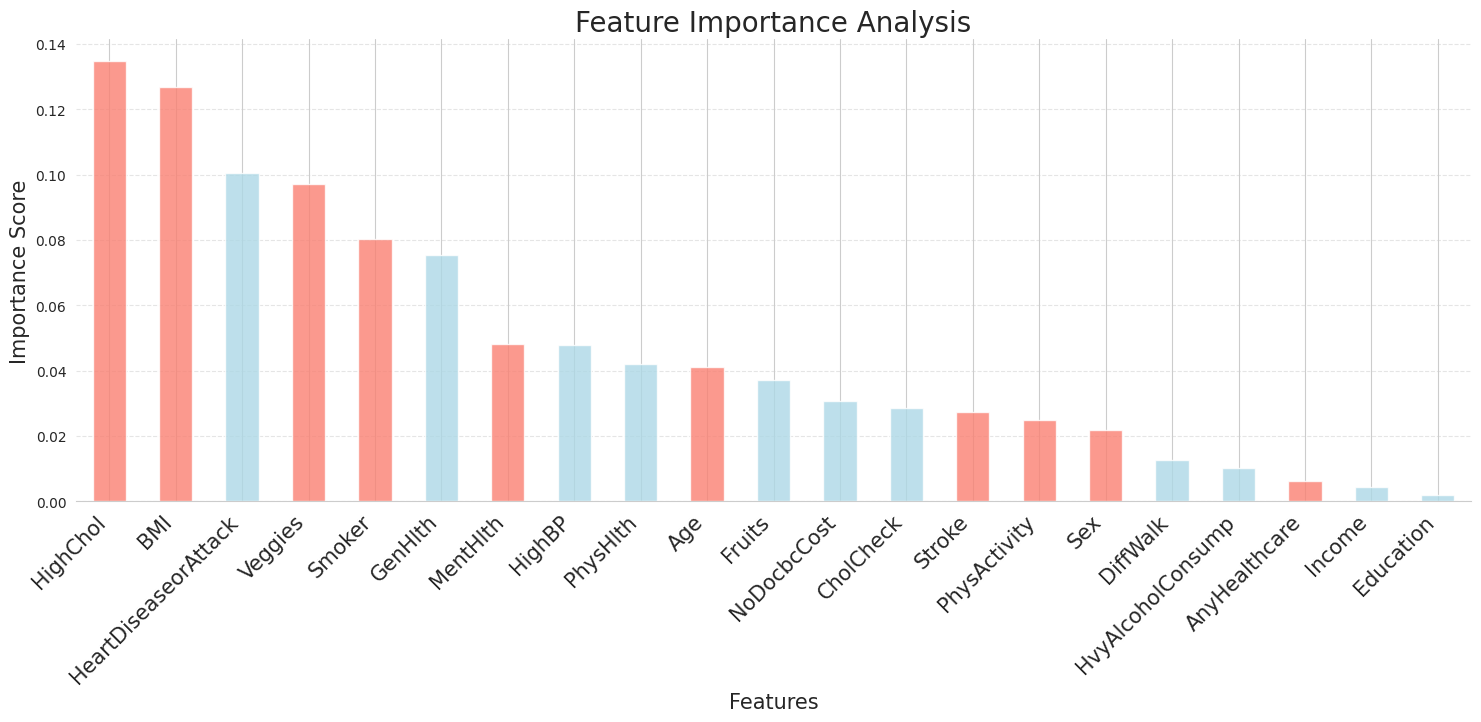

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose 'rdf_classifier' is your trained RandomForestClassifier and 'X' is your feature matrix
classifier = rdf_classifier

# Extract feature importances from the trained classifier
feature_importance = pd.Series(classifier.feature_importances_, index=X.columns)

# Define colors based on feature importance relative to the median
colors = ['lightblue' if value <= feature_importance.median() else 'salmon' for value in feature_importance]

# Create a bar plot of feature importances
plt.figure(figsize=(18, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color=colors, alpha=0.8, zorder=3)

# Enhance plot aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=1)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance Score', fontsize=15)
plt.title('Feature Importance Analysis', fontsize=20)
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.show()


**Confusion Matrix**

**Random Forest**

           Model  Train_Accuracy  Train_AUC  Train_RMSE  Test_Accuracy  \
0  Random_Forest        0.996783   0.999739    0.056718       0.839721   

   Test_AUC  Test_RMSE  Unseen_Accuracy  Unseen_AUC  Unseen_RMSE  
0   0.77414   0.400348         0.963721    0.975643     0.190469  
RandomForest:
              precision    recall  f1-score   support

Non-diabetic       0.97      0.99      0.98    194377
    Diabetic       0.92      0.83      0.88     35097

    accuracy                           0.96    229474
   macro avg       0.95      0.91      0.93    229474
weighted avg       0.96      0.96      0.96    229474



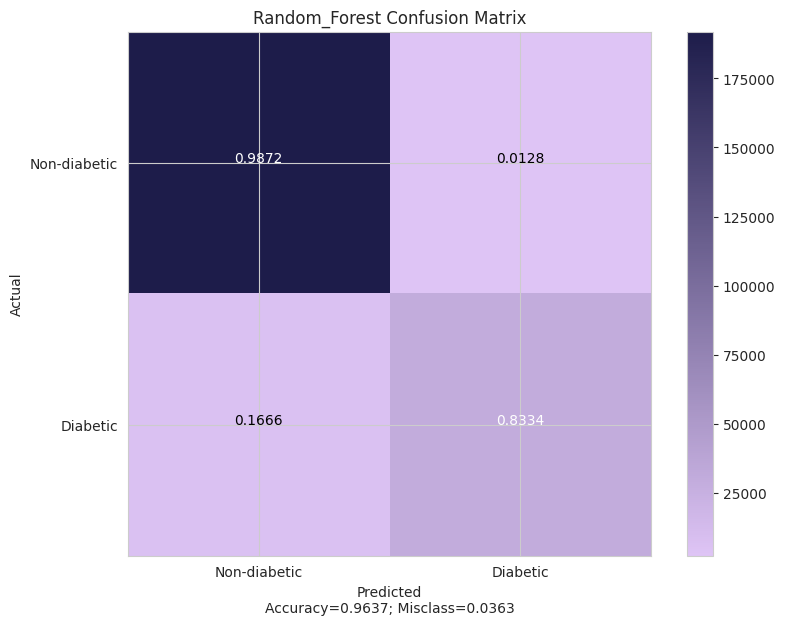

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

# Initialize an empty list to store model performance information
info_clf = []

# Create a Random Forest Classifier with a fixed random state
clf = RandomForestClassifier(random_state=508312)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predictions and performance metrics on the training data
y_pred_train = clf.predict(X_train)
y_pred_proba_train = clf.predict_proba(X_train)[:, 1]
acc_score_train = accuracy_score(y_train, y_pred_train)
auc_score_train = roc_auc_score(y_train, y_pred_proba_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Predictions and performance metrics on the test data
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
acc_score_test = accuracy_score(y_test, y_pred_test)
auc_score_test = roc_auc_score(y_test, y_pred_proba_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Predictions and performance metrics on the unseen dataset df2
y_pred_unseen = clf.predict(df2_X_scaled)
y_pred_proba_unseen = clf.predict_proba(df2_X_scaled)[:, 1]
acc_score_unseen = accuracy_score(df2_y, y_pred_unseen)
auc_score_unseen = roc_auc_score(df2_y, y_pred_proba_unseen)
rmse_unseen = np.sqrt(mean_squared_error(df2_y, y_pred_unseen))

# Append the model performance metrics to the info_clf list
info_clf.append(['Random_Forest', acc_score_train, auc_score_train, rmse_train,
                 acc_score_test, auc_score_test, rmse_test,
                 acc_score_unseen, auc_score_unseen, rmse_unseen])

# Create a DataFrame to store the model performance information
info_df = pd.DataFrame(info_clf, columns=['Model', 'Train_Accuracy', 'Train_AUC', 'Train_RMSE',
                                          'Test_Accuracy', 'Test_AUC', 'Test_RMSE',
                                          'Unseen_Accuracy', 'Unseen_AUC', 'Unseen_RMSE'])

print(info_df)

# Confusion matrix plot function
def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap='Blues', normalize=True):
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Print classification report
print('RandomForest:')
print(classification_report(df2_y, y_pred_unseen, target_names=['Non-diabetic', 'Diabetic']))

# Define target names and custom colormap
target_names = ['Non-diabetic', 'Diabetic']
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#dec4f5', '#1d1c4a'])

# Compute confusion matrix
cm = confusion_matrix(df2_y, y_pred_unseen)

# Adjusted title and normalize=True for better Confusion Matrix
plot_confusion_matrix(cm, target_names, 'Random_Forest Confusion Matrix', custom_cmap, normalize=True)


**Random Forest using Class Weights**

RandomForest:
              precision    recall  f1-score   support

Non-Diabetic       0.97      0.99      0.98    194377
    Diabetic       0.91      0.84      0.87     35097

    accuracy                           0.96    229474
   macro avg       0.94      0.91      0.93    229474
weighted avg       0.96      0.96      0.96    229474



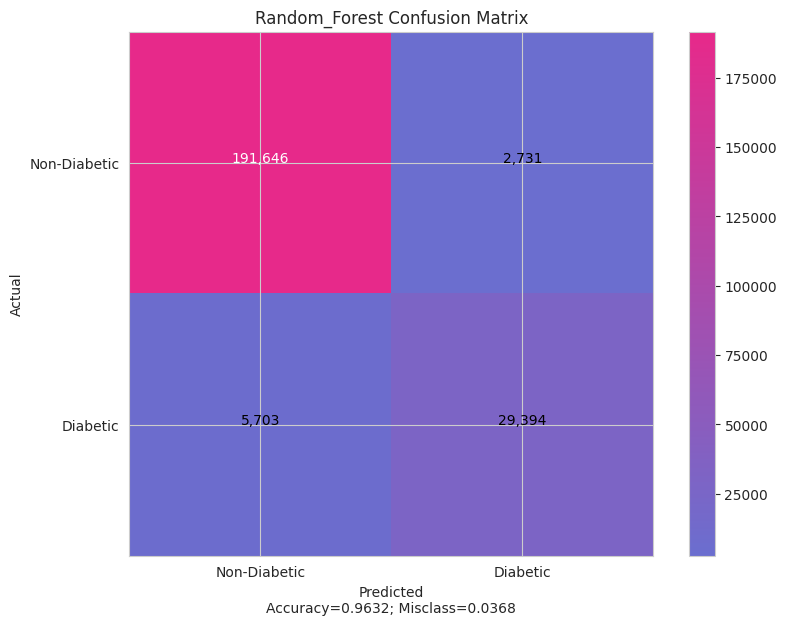

,Model,Train_RMSE,Train_AUC,Train_Accuracy,Test_RMSE,Test_AUC,Test_Accuracy,Unseen_RMSE,Unseen_AUC,Unseen_Accuracy
0,Random_Forest,0.996783,0.999174,0.056718,0.838022,0.772136,0.402465,0.963246,0.973786,0.191712


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, confusion_matrix, classification_report

# Initialize an empty list to store model performance information
info_clf = []

# Initialize RandomForestClassifier with class_weight
clf = RandomForestClassifier(random_state=508312, class_weight={0: 1, 1: 20})
clf.fit(X_train, y_train)

# Predictions and performance metrics on X_train
y_pred_train = clf.predict(X_train)
y_pred_proba_train = clf.predict_proba(X_train)[:, 1]
acc_score_train = accuracy_score(y_train, y_pred_train)
auc_score_train = roc_auc_score(y_train, y_pred_proba_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Predictions and performance metrics on X_test
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
acc_score_test = accuracy_score(y_test, y_pred_test)
auc_score_test = roc_auc_score(y_test, y_pred_proba_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Predictions and performance metrics on balanced unseen dataset df2
y_pred_unseen = clf.predict(df2_X_scaled)
y_pred_proba_unseen = clf.predict_proba(df2_X_scaled)[:, 1]
acc_score_unseen = accuracy_score(df2_y, y_pred_unseen)
auc_score_unseen = roc_auc_score(df2_y, y_pred_proba_unseen)
rmse_unseen = np.sqrt(mean_squared_error(df2_y, y_pred_unseen))

# Append the model performance metrics to info_clf list
info_clf.append(['Random_Forest', acc_score_train, auc_score_train, rmse_train,
                 acc_score_test, auc_score_test, rmse_test, acc_score_unseen,
                 auc_score_unseen, rmse_unseen])

# Create a DataFrame to store the model performance information
info_df = pd.DataFrame(info_clf, columns=['Model', 'Train_RMSE', 'Train_AUC',
                                          'Train_Accuracy', 'Test_RMSE', 'Test_AUC',
                                          'Test_Accuracy', 'Unseen_RMSE', 'Unseen_AUC',
                                          'Unseen_Accuracy'])

print('RandomForest:')
print(classification_report(df2_y, y_pred_unseen, target_names=['Non-Diabetic', 'Diabetic']))

# Define target names and custom colormap
target_names = ['Non-Diabetic', 'Diabetic']

# Updated custom colormap for better contrast
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#6b6ecf', '#e7298a'])

# Compute confusion matrix
cm = confusion_matrix(df2_y, y_pred_unseen)

# Plot confusion matrix with custom settings
plot_confusion_matrix(cm, target_names, 'Random_Forest Confusion Matrix', custom_cmap, normalize=False)

info_df


**Optimizing Random Forest with Class Weights and Minimum Impurity Decrease**

RandomForest:
              precision    recall  f1-score   support

Non:diabetic       0.98      0.88      0.93    194377
    Diabetic       0.57      0.91      0.70     35097

    accuracy                           0.88    229474
   macro avg       0.78      0.89      0.81    229474
weighted avg       0.92      0.88      0.89    229474



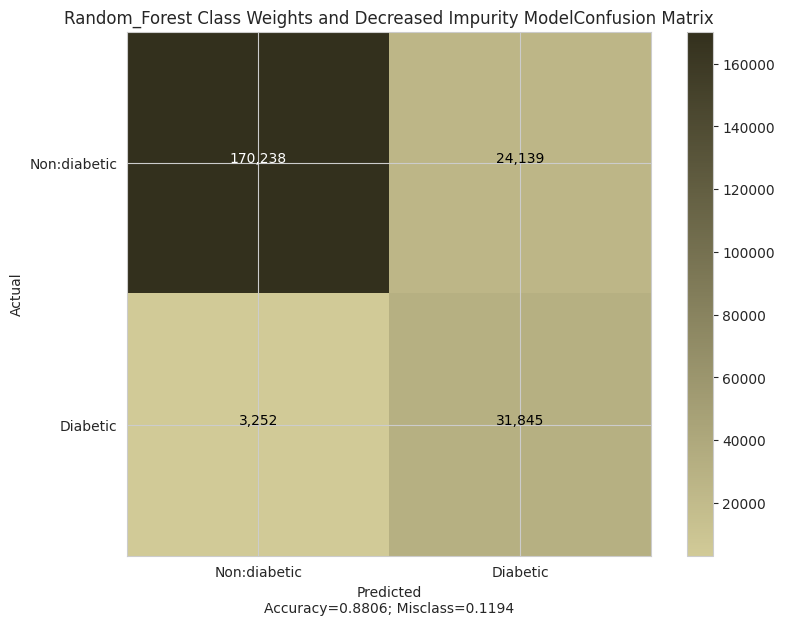

,Model,Train_RMSE,Train_AUC,Train_Accuracy,Test_RMSE,Test_AUC,Test_Accuracy,Unseen_RMSE,Unseen_AUC,Unseen_Accuracy
0,Random_Forest,0.944402,0.996632,0.235793,0.779693,0.78712,0.469369,0.880636,0.951101,0.345491


In [ ]:
info_clf = []

# Initialize RandomForestClassifier with class_weight and min_impurity_decrease
clf = RandomForestClassifier(random_state=508312, class_weight={0: 1, 1: 12}, min_impurity_decrease=1e-07)
clf.fit(X_train, y_train)

# Predictions and performance metrics on X_train
y_pred_train = clf.predict(X_train)
y_pred_proba_train = clf.predict_proba(X_train)[:, 1]
acc_score_train = accuracy_score(y_train, y_pred_train)
auc_score_train = roc_auc_score(y_train, y_pred_proba_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Predictions and performance metrics on X_test
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
acc_score_test = accuracy_score(y_test, y_pred_test)
auc_score_test = roc_auc_score(y_test, y_pred_proba_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Predictions and performance metrics on balanced unseen dataset df2
y_pred_unseen = clf.predict(df2_X_scaled)
y_pred_proba_unseen = clf.predict_proba(df2_X_scaled)[:, 1]
acc_score_unseen = accuracy_score(df2_y, y_pred_unseen)
auc_score_unseen = roc_auc_score(df2_y, y_pred_proba_unseen)
rmse_unseen = np.sqrt(mean_squared_error(df2_y, y_pred_unseen))

# Append the model performance metrics to info_clf list
info_clf.append(['Random_Forest', acc_score_train, auc_score_train, rmse_train,
                 acc_score_test, auc_score_test, rmse_test, acc_score_unseen,
                 auc_score_unseen, rmse_unseen])

# Create a DataFrame to store the model performance information
info_df = pd.DataFrame(info_clf, columns=['Model', 'Train_RMSE', 'Train_AUC',
                                          'Train_Accuracy', 'Test_RMSE', 'Test_AUC',
                                          'Test_Accuracy', 'Unseen_RMSE', 'Unseen_AUC',
                                          'Unseen_Accuracy'])

print('RandomForest:')
print(classification_report(df2_y, y_pred_unseen, target_names=['Non:diabetic', 'Diabetic']))

# Define target names and custom colormap
target_names = ['Non:diabetic', 'Diabetic']
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#d1ca97', '#33301d'])

# Compute confusion matrix
cm = confusion_matrix(df2_y, y_pred_unseen)

# Plot confusion matrix with custom settings
plot_confusion_matrix(cm, target_names, 'Random_Forest Class Weights and Decreased Impurity ModelConfusion Matrix', custom_cmap, normalize=False)

info_df